# Customer Life Time Value Predition

### Data Set Information

The data is collected from IBM Watson Analytics. 
The lifetime value of a customer, or customer lifetime value (CLV), represents the total amount of money a customer is expected to spend in business, or on products, during their lifetime. 
This is an important figure to know because it helps company to make decisions about how much money to invest in acquiring new customers and retaining existing ones.

**Objective:  The objective of this project is to predict Customer Life Time Value**

### Following Libraries are used for this project:

In [676]:
import pandas as pd
import numpy as np
import pylab as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import mglearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

### Reading the data from CSV

In [677]:
df = pd.read_csv("CLV_Data.csv")

In [678]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,AA10041,California,7901.744238,No,Basic,High School or Below,02/02/11,Unemployed,M,0.0,...,83.0,0.0,5.0,Personal Auto,Personal L3,Offer1,Call Center,1258.327804,SUV,Medsize
1,AA11235,Nevada,2568.843396,No,Basic,Bachelor,1/28/11,Medical Leave,F,11167.0,...,99.0,3.0,1.0,Personal Auto,Personal L3,Offer2,Branch,350.400000,Two-Door Car,Medsize
2,AA16582,Washington,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072.0,...,3.0,0.0,2.0,Personal Auto,Personal L2,Offer1,Agent,511.200000,Four-Door Car,Medsize
3,AA30683,California,6595.101921,No,Premium,Bachelor,1/15/11,Unemployed,M,0.0,...,38.0,2.0,7.0,Personal Auto,Personal L3,Offer1,Web,847.717402,Four-Door Car,Medsize
4,AA34092,California,28799.954150,No,Extended,College,02/11/11,Employed,M,33635.0,...,23.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Web,1152.000000,Luxury SUV,Medsize


In [679]:
df.tail()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,ZZ77357,Nevada,4468.220900,No,Basic,High School or Below,01/09/11,Unemployed,M,0.0,...,61.0,0.0,9.0,Corporate Auto,Corporate L2,Offer1,Agent,468.000000,Two-Door Car,Medsize
9130,ZZ83340,Oregon,5508.315536,No,Basic,Doctor,02/04/11,Employed,F,96021.0,...,30.0,0.0,5.0,Personal Auto,Personal L1,Offer3,Branch,315.004602,Two-Door Car,Medsize
9131,ZZ89380,Oregon,3196.578455,No,Extended,Bachelor,01/10/11,Employed,F,62815.0,...,84.0,0.0,1.0,Special Auto,Special L1,Offer2,Call Center,47.061469,Two-Door Car,Large
9132,ZZ91716,California,3256.766388,No,Extended,Bachelor,1/22/11,Unemployed,F,0.0,...,56.0,0.0,1.0,Personal Auto,Personal L3,Offer2,Web,491.755368,Four-Door Car,Small
9133,ZZ97035,California,20714.940430,No,Extended,College,02/01/11,Unemployed,M,0.0,...,66.0,0.0,2.0,Corporate Auto,Corporate L1,Offer1,Branch,2027.724442,Luxury Car,Small


## Exploring the dataset

### Calculating number of rows and columns

In [680]:
print("Total Number of Columns: ", df.shape[1])
print("Total Number of Rows: ", df.shape[0])

Total Number of Columns:  24
Total Number of Rows:  9134


### Calculating total number null values

In [681]:
print("Total number of Null Values: ", df.isnull().sum().sum())

Total number of Null Values:  925


### Data Types of each column

In [682]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                           float64
Location Code                     object
Marital Status                    object
Monthly Premium Auto             float64
Months Since Last Claim          float64
Months Since Policy Inception    float64
Number of Open Complaints        float64
Number of Policies               float64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

### Basic information of data frame

In [683]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9087 non-null   object 
 4   Coverage                       9078 non-null   object 
 5   Education                      9048 non-null   object 
 6   Effective To Date              9065 non-null   object 
 7   EmploymentStatus               9052 non-null   object 
 8   Gender                         9062 non-null   object 
 9   Income                         9081 non-null   float64
 10  Location Code                  9033 non-null   object 
 11  Marital Status                 9062 non-null   object 
 12  Monthly Premium Auto           9081 non-null   f

### Various descriptive statistics on the DataFrame

In [684]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9081.000000,9081.000000,9081.000000,9083.000000,9087.000000,9107.000000,9134.000000
mean,8004.940475,37631.804317,93.218478,15.102962,48.052406,0.385386,2.966509,434.088794
std,6870.967608,30386.530349,34.423683,10.075916,27.880251,0.912190,2.390698,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33881.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62271.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### Correlation Matrix

In [685]:
cor_mat = df.corr() 
cor_mat

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.025197,0.396750,0.011341,0.009627,-0.036822,0.022065,0.226451
Income,0.025197,1.000000,-0.016457,-0.025196,-0.000988,0.007091,-0.009461,-0.355679
Monthly Premium Auto,0.396750,-0.016457,1.000000,0.005255,0.022409,-0.012493,-0.012119,0.631944
Months Since Last Claim,0.011341,-0.025196,0.005255,1.000000,-0.041670,0.004814,0.009374,0.006805
Months Since Policy Inception,0.009627,-0.000988,0.022409,-0.041670,1.000000,-0.000736,-0.012581,0.004275
Number of Open Complaints,-0.036822,0.007091,-0.012493,0.004814,-0.000736,1.000000,0.001953,-0.014549
Number of Policies,0.022065,-0.009461,-0.012119,0.009374,-0.012581,0.001953,1.000000,-0.002169
Total Claim Amount,0.226451,-0.355679,0.631944,0.006805,0.004275,-0.014549,-0.002169,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

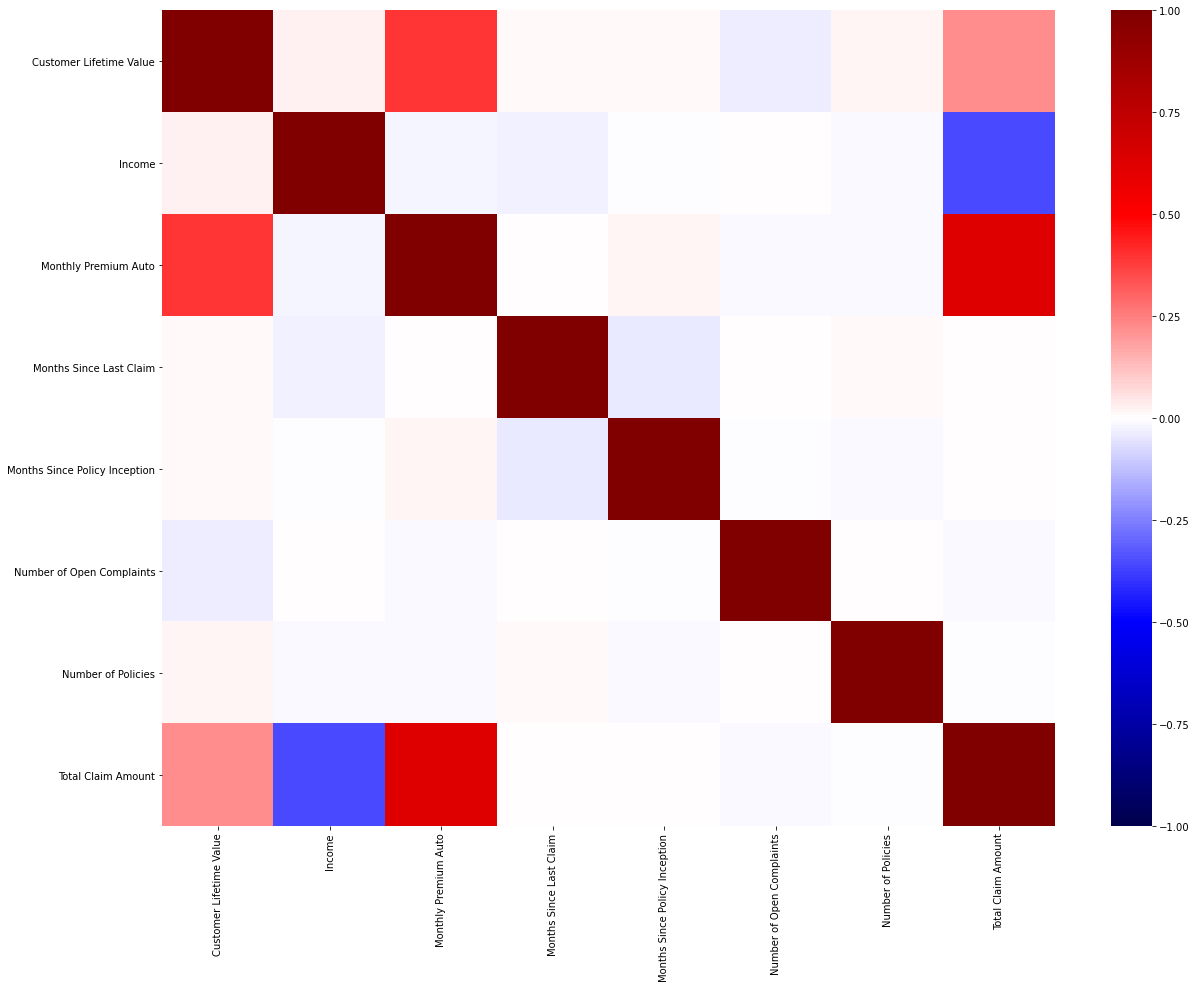

In [686]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(cor_mat, vmin = -1, vmax = 1, cmap= "seismic")
plt.gca().patch.set(hatch = "df", edgecolor = "#555")
plt.show

From the correlation matrix we can infer that Monthly Premium Auto and Total Claim Amount are highly correlated with the target variable Customer Lifetime Value.

### Box Plots of Numerical Variables

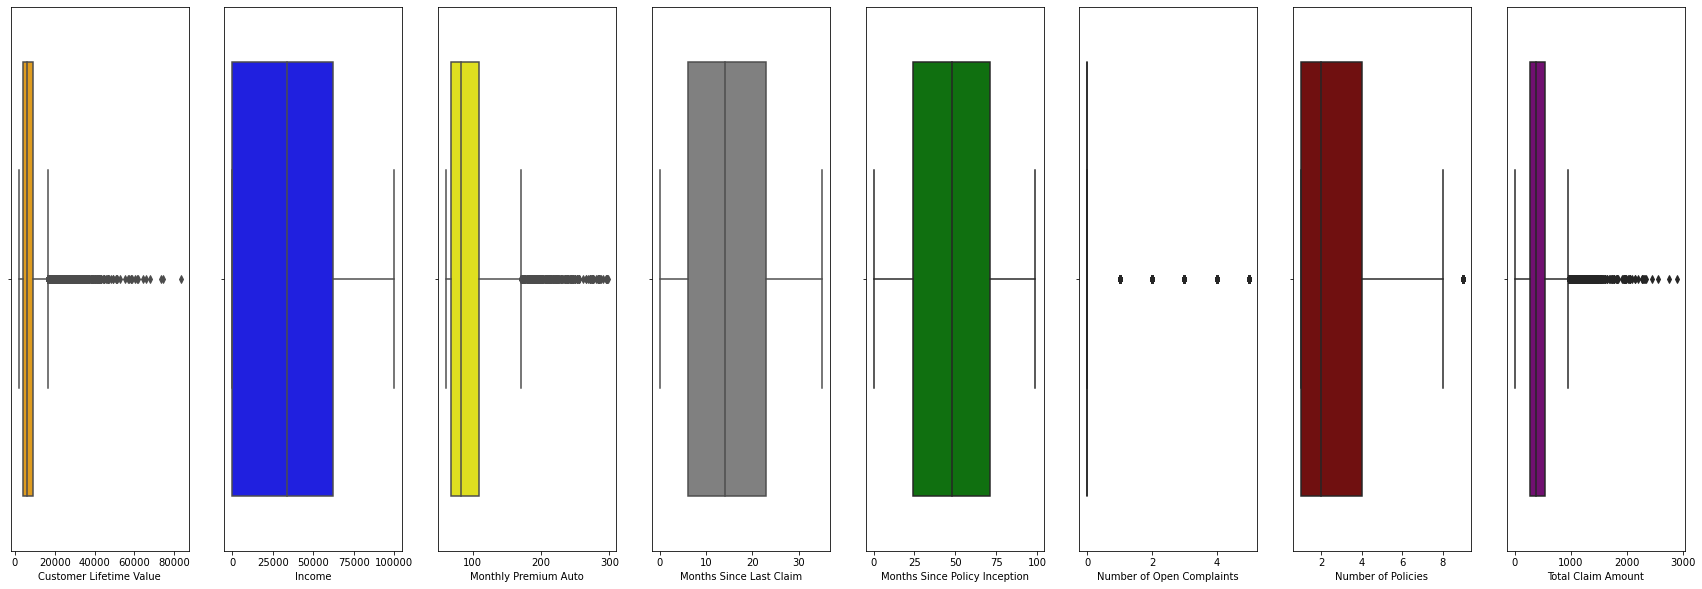

In [687]:
fig, axes = plt.subplots(ncols=8, figsize=(30,10))
box_plot1 = sns.boxplot(df["Customer Lifetime Value"], ax=axes[0], color = 'orange')
box_plot2 = sns.boxplot(df["Income"], ax=axes[1], color = 'blue')
box_plot3 = sns.boxplot(df["Monthly Premium Auto"], ax=axes[2], color = 'Yellow')
box_plot4 = sns.boxplot(df["Months Since Last Claim"], ax=axes[3], color = 'Gray')
box_plot5 = sns.boxplot(df["Months Since Policy Inception"], ax=axes[4], color = 'green')
box_plot6 = sns.boxplot(df["Number of Open Complaints"], ax=axes[5], color = 'green')
box_plot7 = sns.boxplot(df["Number of Policies"], ax=axes[6], color = 'maroon')
box_plot8 = sns.boxplot(df["Total Claim Amount"], ax=axes[7], color = 'purple')

plt.show()

### Feature: Customer Lifetime Value (Target Variable)

In [688]:
print("Target Variable Statistics: ")
df['Customer Lifetime Value'].describe()

Target Variable Statistics: 


count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [689]:
print("Total number of null values:", df['Customer Lifetime Value'].describe().isnull().sum())

Total number of null values: 0


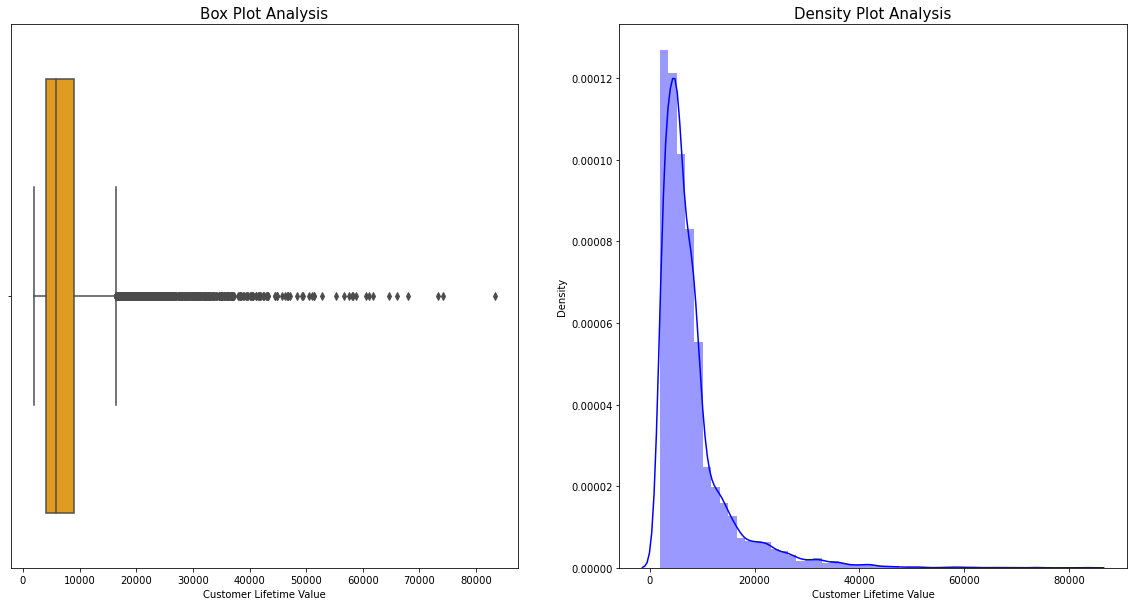

In [690]:
fig, axes = plt.subplots(ncols=2, figsize=(20,10))
box_plot = sns.boxplot(df["Customer Lifetime Value"], ax=axes[0], color = 'orange')
axes[0].set_title("Box Plot Analysis", fontsize=15)
dist_plot = sns.distplot(df["Customer Lifetime Value"], kde=True, ax=axes[1], color = 'blue')
axes[1].set_title("Density Plot Analysis", fontsize=15)
plt.show()

We can infer following:
    
    There are no null values.
    There are few outliers.
    The density plot is skewed towards right, so we will take median for statistical analysis.

### Feature: Response

In [691]:
df[['Customer Lifetime Value', 'Response']].groupby('Response').median()

,Customer Lifetime Value
Response,
No,5808.463583
Yes,5597.124960


In [692]:
print("Total number of null values:", df['Response'].describe().isnull().sum())

Total number of null values: 0


Determining the response of each customer based on their vehicle size.

Text(0, 0.5, 'Count')

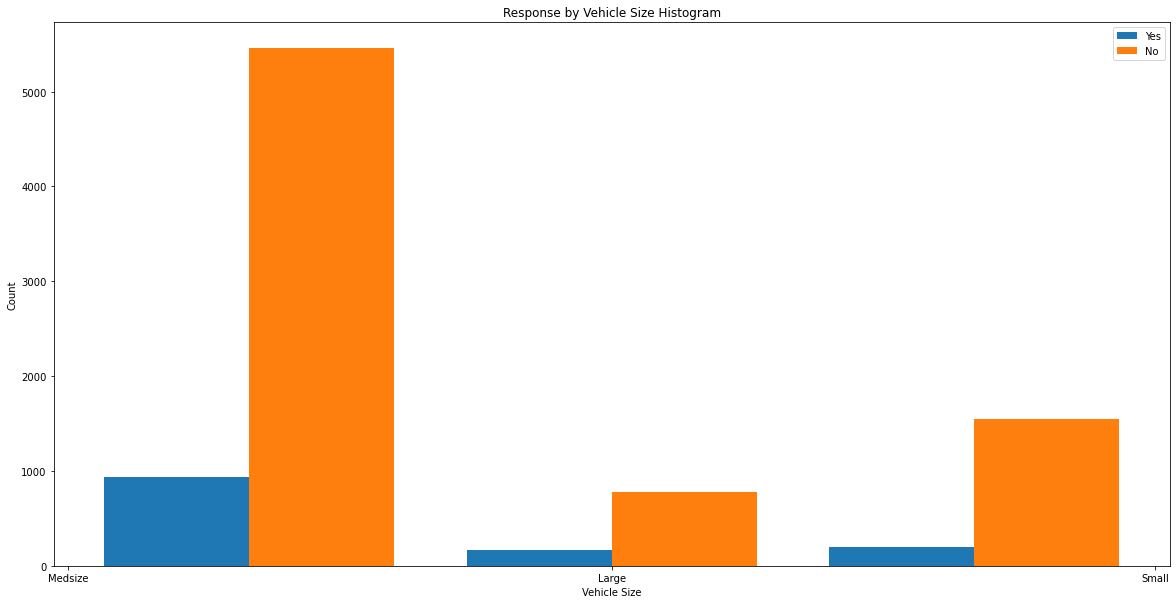

In [693]:
df1 = df[df['Response'] == 'Yes']['Vehicle Size']
df2 = df[df['Response'] == 'No']['Vehicle Size']

plt.hist([df1, df2], bins = 3)
plt.legend(('Yes', 'No'), loc='best')
plt.title('Response by Vehicle Size Histogram')
plt.xlabel('Vehicle Size')
plt.ylabel('Count')

### Feature: Gender

In [694]:
df[['Customer Lifetime Value', 'Gender']].groupby('Gender').median()

,Customer Lifetime Value
Gender,
F,5737.233278
M,5815.049178


Plotting Customer Lifetime Value and Income scatter plots segregated on the basis of Gender.

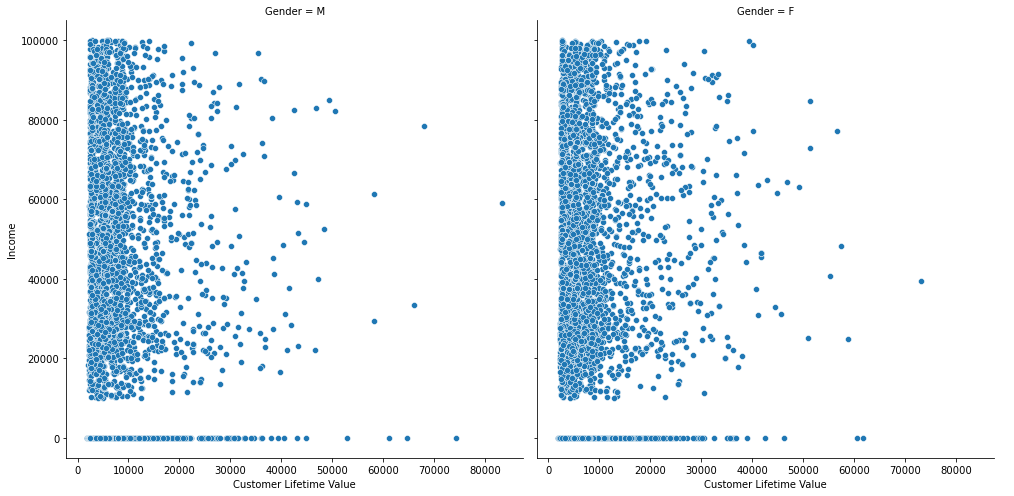

In [695]:
g = sns.FacetGrid(df, col="Gender", height=7)
g.map(sns.scatterplot,'Customer Lifetime Value',  'Income')
g.add_legend()

### Feature: Employment Status

In [696]:
df[['Customer Lifetime Value', 'EmploymentStatus']].groupby('EmploymentStatus').median()

,Customer Lifetime Value
EmploymentStatus,
Disabled,5611.622761
Employed,5860.483090
Medical Leave,5258.924832
Retired,5550.569379
Unemployed,5619.689084


Plotting Customer Lifetime Value and Income scatter plots segregated on the basis of Employment Status.

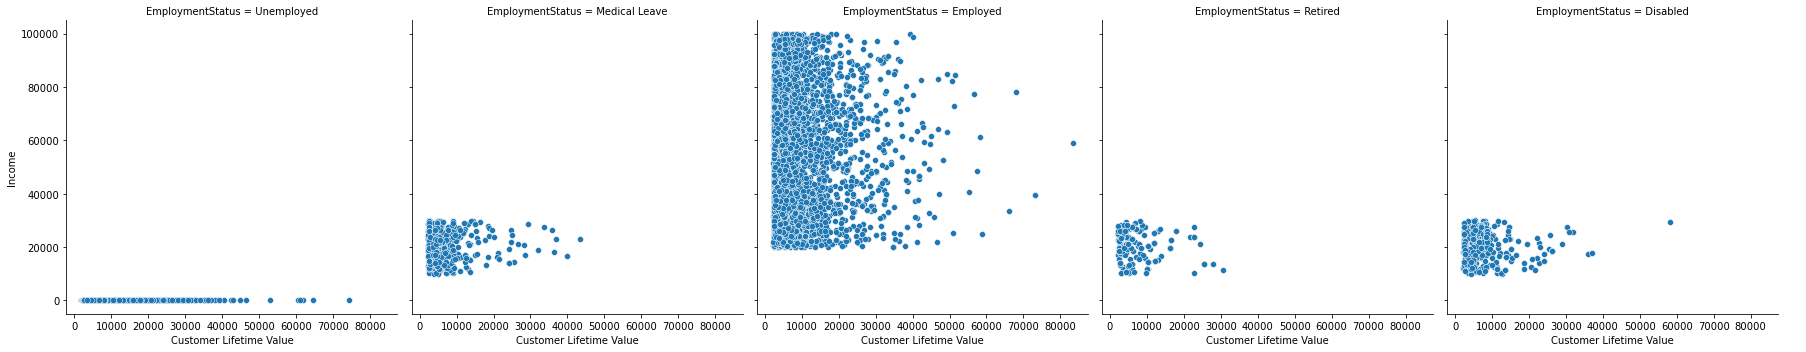

In [697]:
g = sns.FacetGrid(df, col="EmploymentStatus", height=5)
g.map(sns.scatterplot,'Customer Lifetime Value',  'Income')
g.add_legend()

### Feature: Vehicle Class

In [698]:
df[['Customer Lifetime Value', 'Vehicle Class']].groupby('Vehicle Class').median()

,Customer Lifetime Value
Vehicle Class,
Four-Door Car,5320.343098
Luxury Car,14510.443760
Luxury SUV,14395.515695
SUV,8592.585972
Sports Car,8554.788501
Two-Door Car,5266.700976


Plotting Customer Lifetime Value and Total Claim Amount scatter plots segregated on the basis of Vehicle Class.

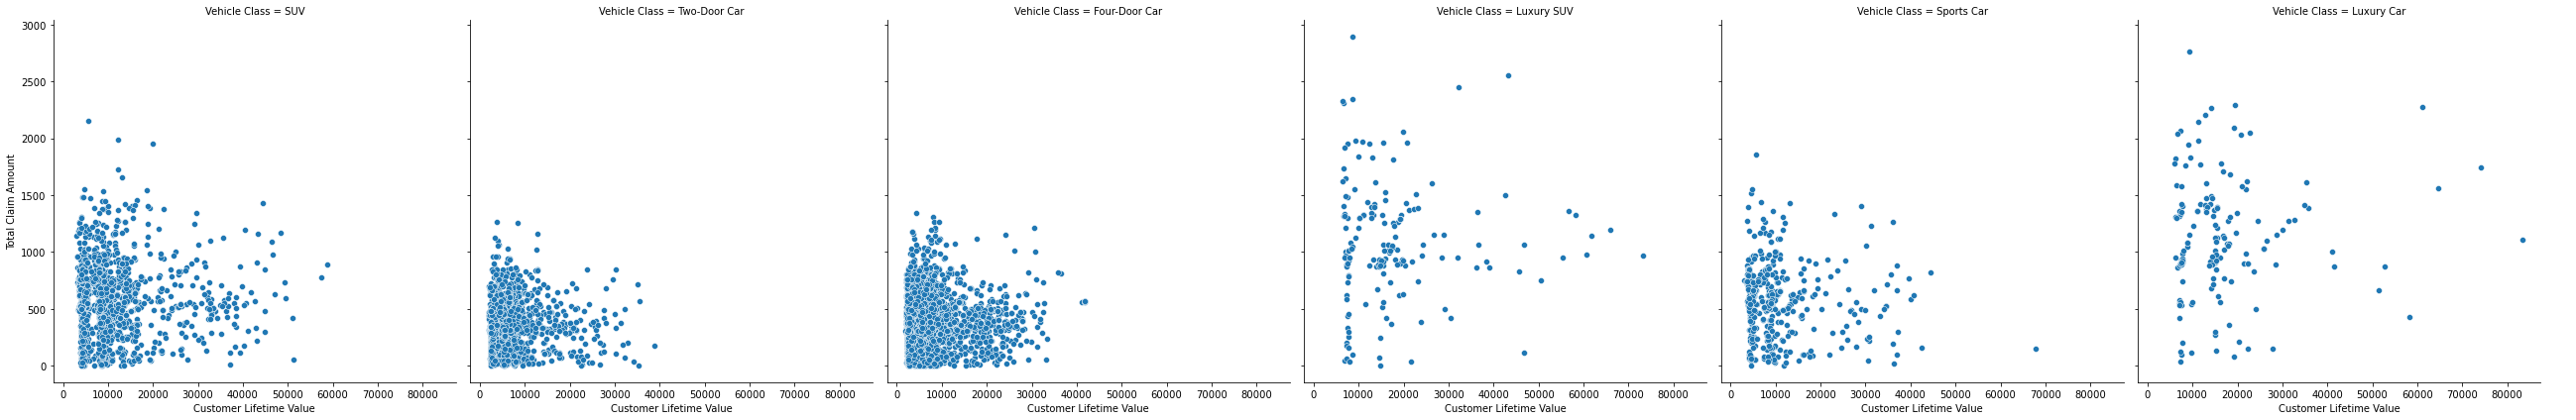

In [699]:
g = sns.FacetGrid(df, col="Vehicle Class", height=6)
g.map(sns.scatterplot,'Customer Lifetime Value',  'Total Claim Amount')
g.add_legend()

### Feature: Monthly Premiuim Auto

In [700]:
print("Statistics: ")
df['Monthly Premium Auto'].describe()

Statistics: 


count    9081.000000
mean       93.218478
std        34.423683
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: Monthly Premium Auto, dtype: float64

In [701]:
print("Total number of null values:", df['Monthly Premium Auto'].describe().isnull().sum())

Total number of null values: 0


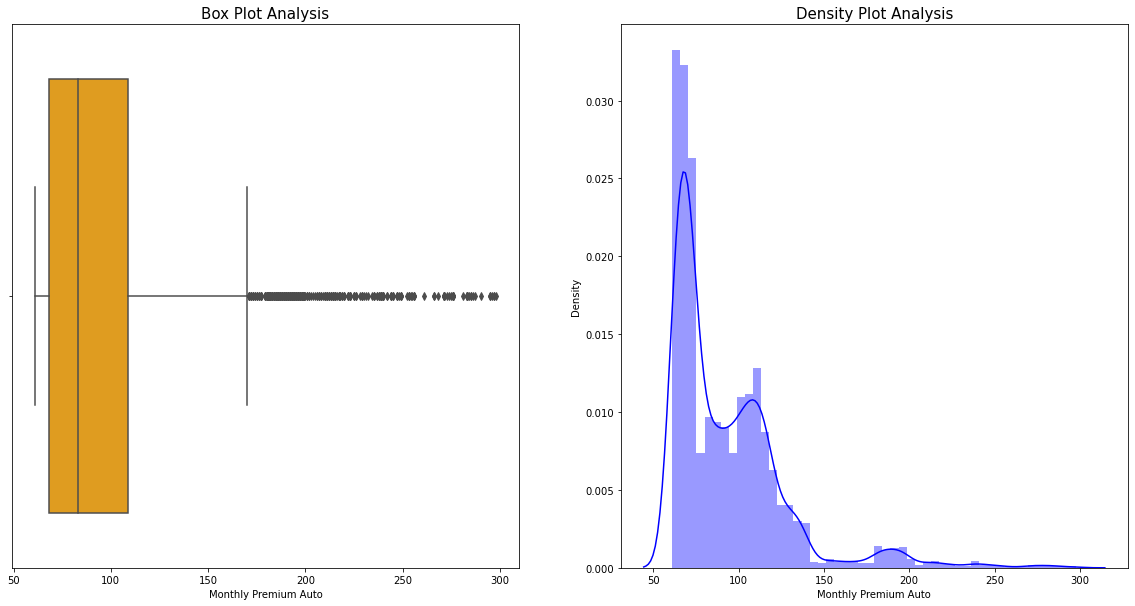

In [702]:
fig, axes = plt.subplots(ncols=2, figsize=(20,10))
box_plot = sns.boxplot(df["Monthly Premium Auto"], ax=axes[0], color = 'orange')
axes[0].set_title("Box Plot Analysis", fontsize=15)
dist_plot = sns.distplot(df["Monthly Premium Auto"], kde=True, ax=axes[1], color = 'blue')
axes[1].set_title("Density Plot Analysis", fontsize=15)
plt.show()

We can infer following:
    
    There are no null values.
    There are few outliers.
    The density plot is skewed towards right, so we will take median for statistical analysis.

### Feature: Total Claim Amount

In [703]:
print("Statistics: ")
df['Total Claim Amount'].describe()

Statistics: 


count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: Total Claim Amount, dtype: float64

In [704]:
print("Total number of null values:", df['Total Claim Amount'].describe().isnull().sum())

Total number of null values: 0


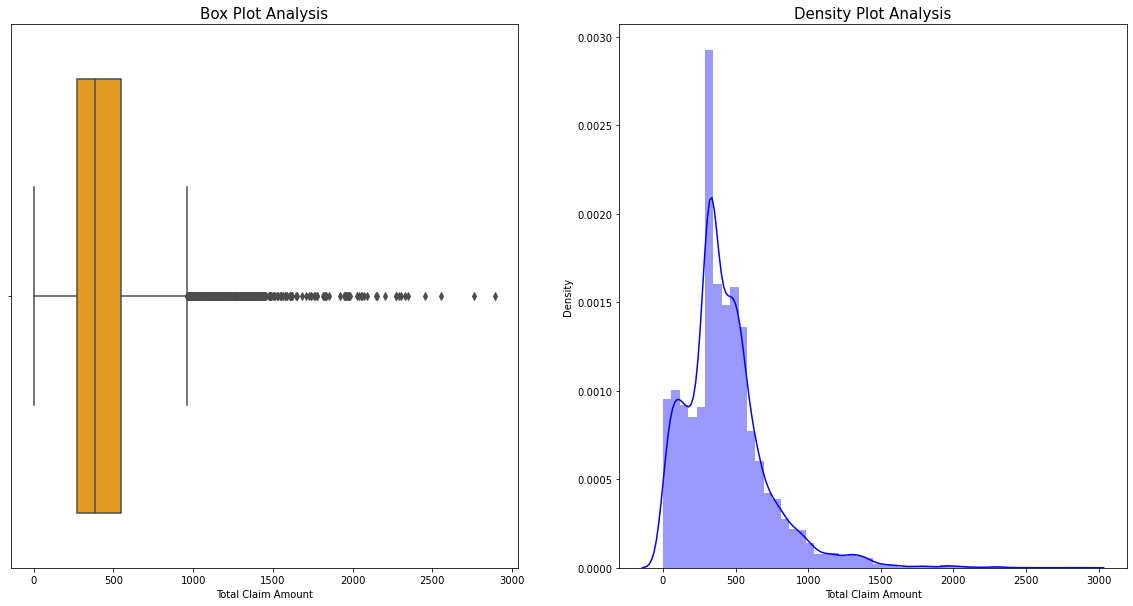

In [705]:
fig, axes = plt.subplots(ncols=2, figsize=(20,10))
box_plot = sns.boxplot(df["Total Claim Amount"], ax=axes[0], color = 'orange')
axes[0].set_title("Box Plot Analysis", fontsize=15)
dist_plot = sns.distplot(df["Total Claim Amount"], kde=True, ax=axes[1], color = 'blue')
axes[1].set_title("Density Plot Analysis", fontsize=15)
plt.show()

We can infer following:
    
    There are no null values.
    There are few outliers.
    The density plot is skewed towards right, so we will take median for statistical analysis.

## Handling Null Values

<AxesSubplot:>

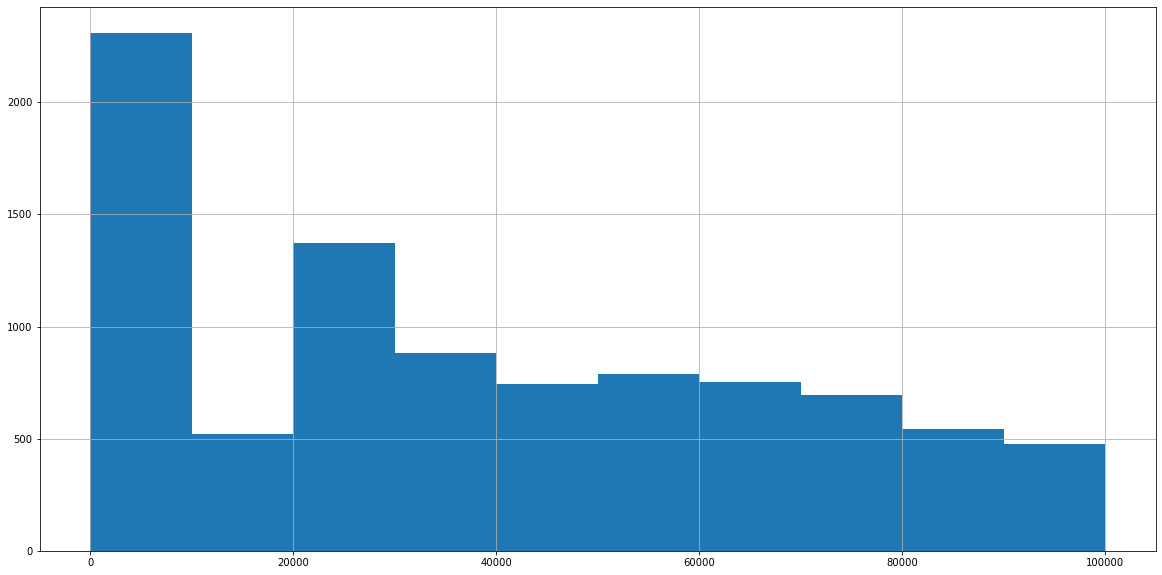

In [706]:
df['Income'].hist()

Since the data is skewed to the right, so we will replace the null values with median.

In [707]:
df['Income'] = df['Income'].fillna(df['Income'].median())

<AxesSubplot:>

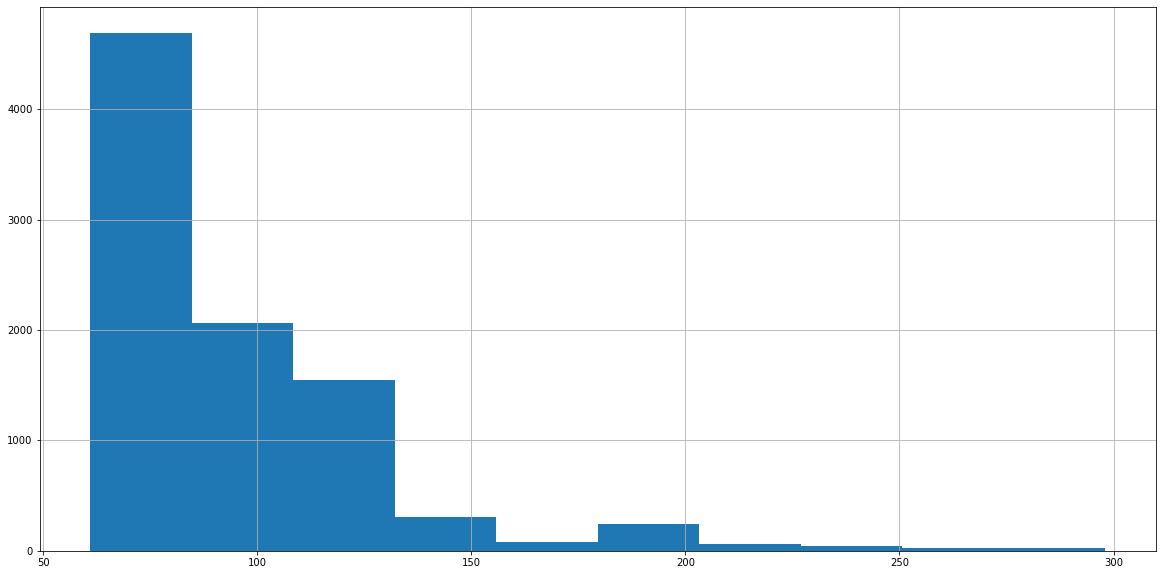

In [708]:
df['Monthly Premium Auto'].hist()

Since the data is skewed to the right, so we will replace the null values with median.

In [709]:
df['Monthly Premium Auto'] = df['Monthly Premium Auto'].fillna(df['Monthly Premium Auto'].median())

<AxesSubplot:>

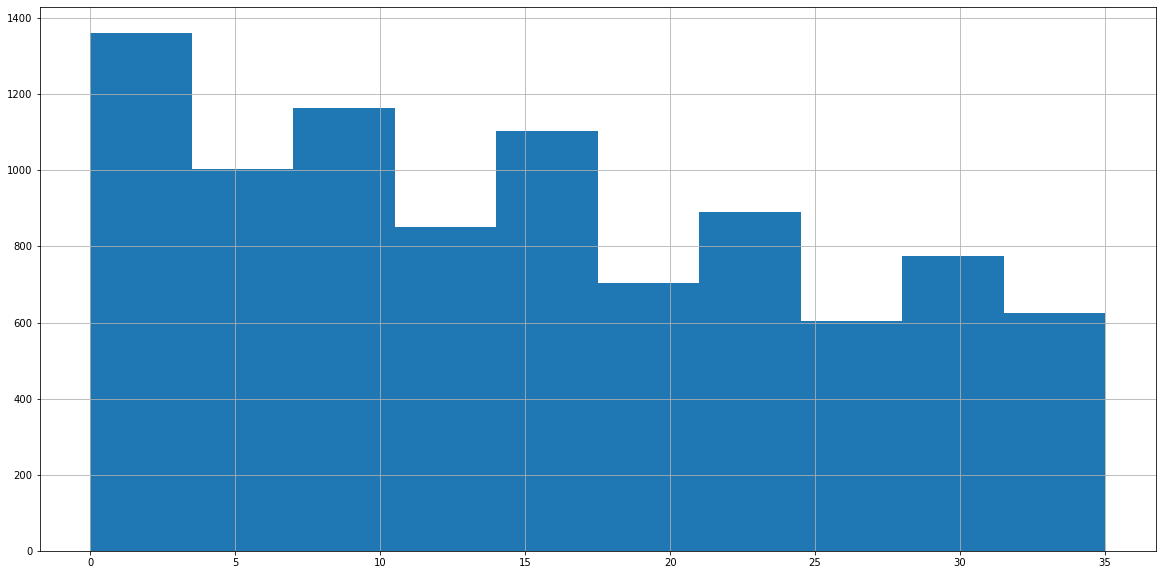

In [710]:
df['Months Since Last Claim'].hist()

Since the data is skewed to the right, so we will replace the null values with median.

In [711]:
df['Months Since Last Claim'] = df['Months Since Last Claim'].fillna(df['Months Since Last Claim'].median())

<AxesSubplot:>

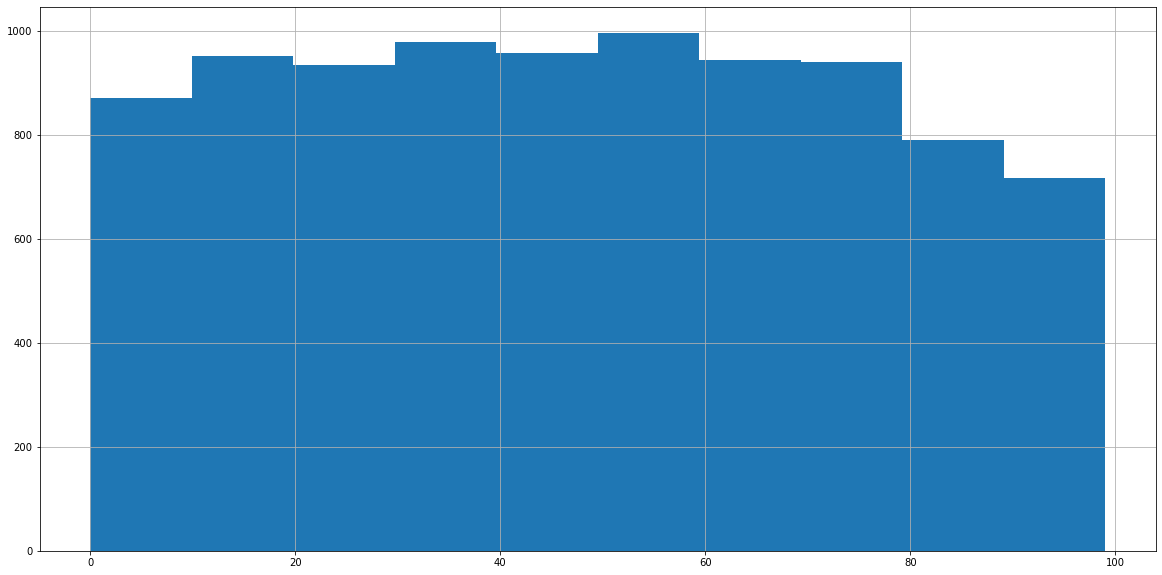

In [712]:
df['Months Since Policy Inception'].hist()

Since the data is uniformly distributed, so we will replace the null values with mean.

In [713]:
df['Months Since Policy Inception'] = df['Months Since Policy Inception'].fillna(df['Months Since Policy Inception'].mean())

<AxesSubplot:>

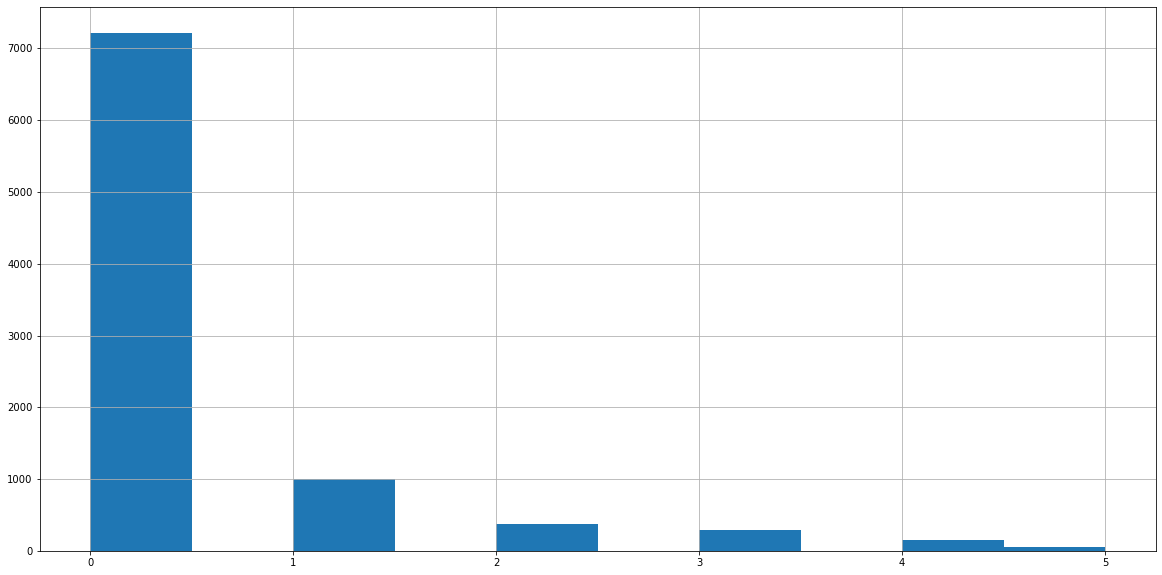

In [714]:
df['Number of Open Complaints'].hist()

Since the data is skewed to the right, so we will replace the null values with median.

In [715]:
df['Number of Open Complaints'] = df['Number of Open Complaints'].fillna(df['Number of Open Complaints'].median())

<AxesSubplot:>

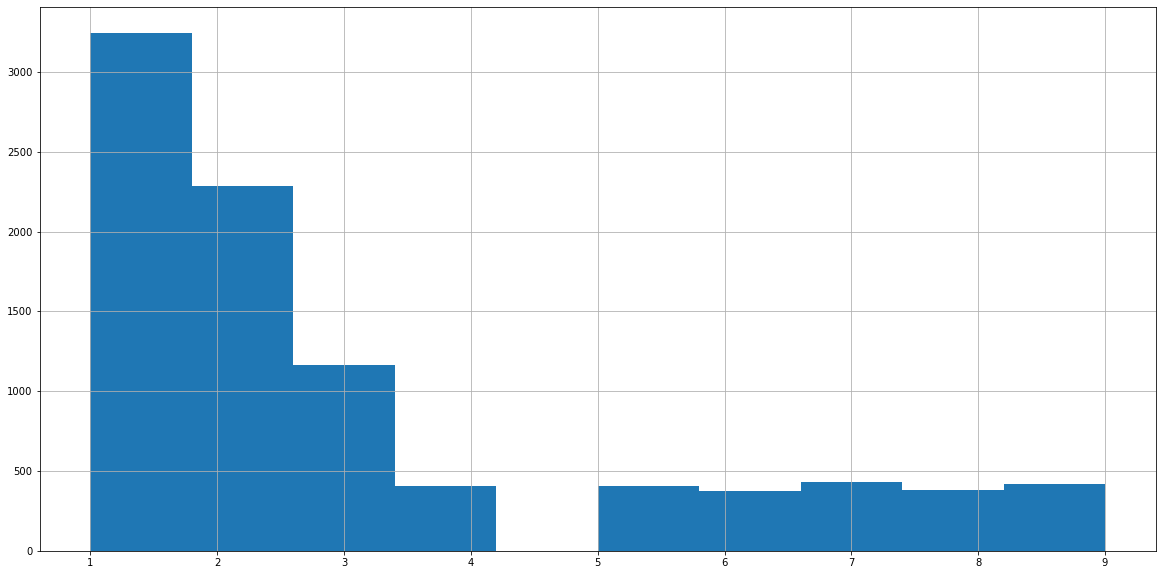

In [716]:
df['Number of Policies'].hist()

Since the data is skewed to the right, so we will replace the null values with median.

In [717]:
df['Number of Policies'] = df['Number of Policies'].fillna(df['Number of Policies'].median())

<AxesSubplot:>

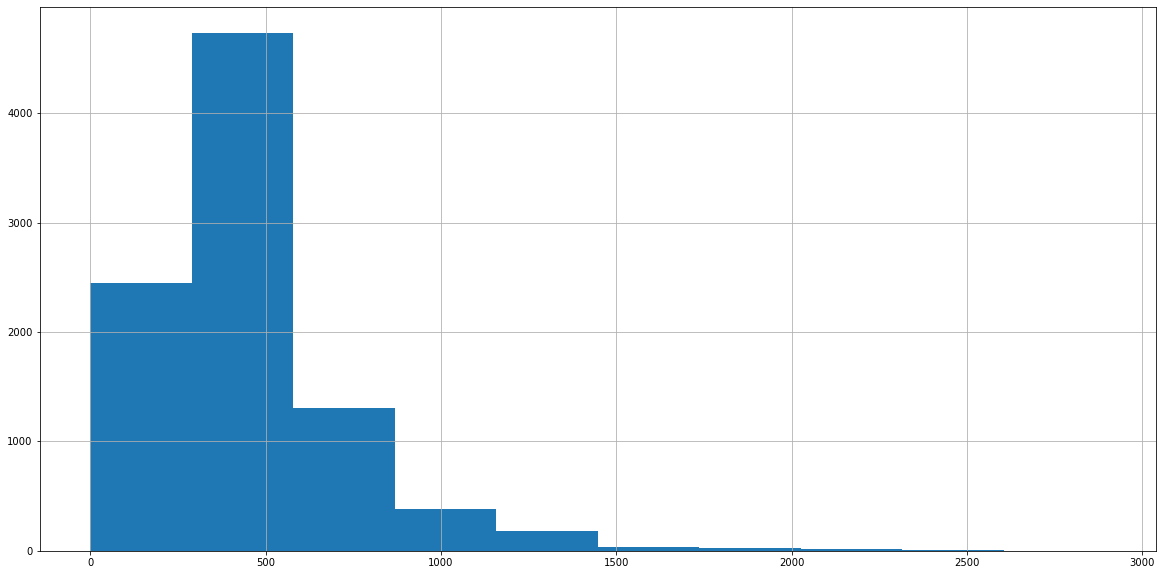

In [718]:
df['Total Claim Amount'].hist()

Since the data is skewed to the right, so we will replace the null values with median.

In [719]:
df['Total Claim Amount'] = df['Total Claim Amount'].fillna(df['Total Claim Amount'].median())

In [720]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9087 non-null   object 
 4   Coverage                       9078 non-null   object 
 5   Education                      9048 non-null   object 
 6   Effective To Date              9065 non-null   object 
 7   EmploymentStatus               9052 non-null   object 
 8   Gender                         9062 non-null   object 
 9   Income                         9134 non-null   float64
 10  Location Code                  9033 non-null   object 
 11  Marital Status                 9062 non-null   object 
 12  Monthly Premium Auto           9134 non-null   f

## Handling Missing Values in Categofrical or Ordinal Variables

<AxesSubplot:>

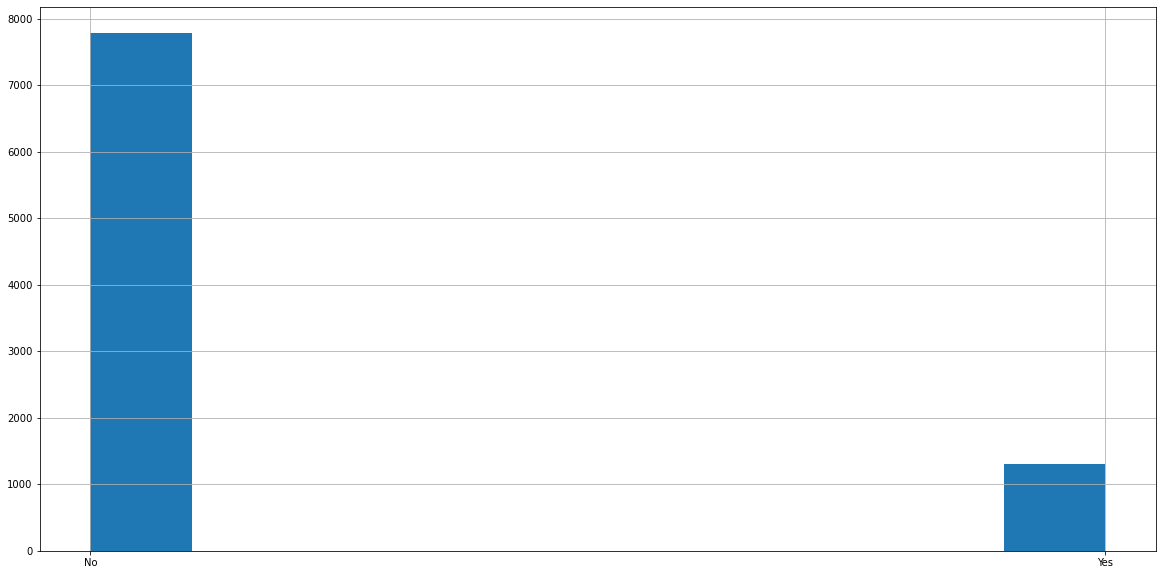

In [721]:
df['Response'].hist()

Since the majority of customers says 'No', so we replace the missing values with mode.

In [722]:
df['Response'] = df['Response'].fillna(df['Response'].mode()[0])

<AxesSubplot:>

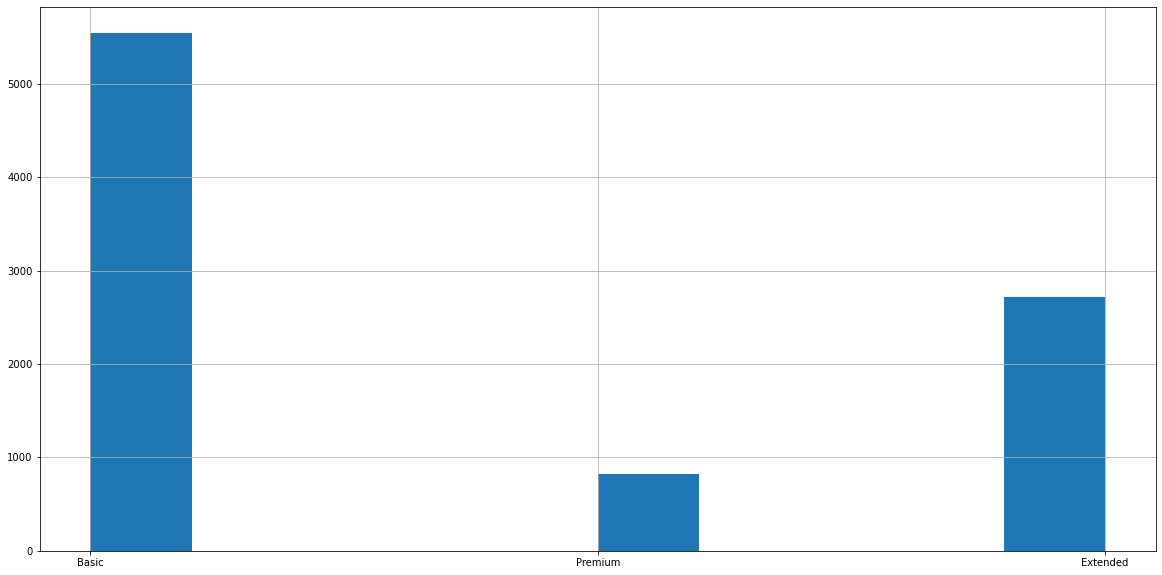

In [723]:
df['Coverage'].hist()

Since the majority of customers have 'Basic' coverage, so we replace the missing values with mode.

In [724]:
df['Coverage'] = df['Coverage'].fillna(df['Coverage'].mode()[0])

<AxesSubplot:>

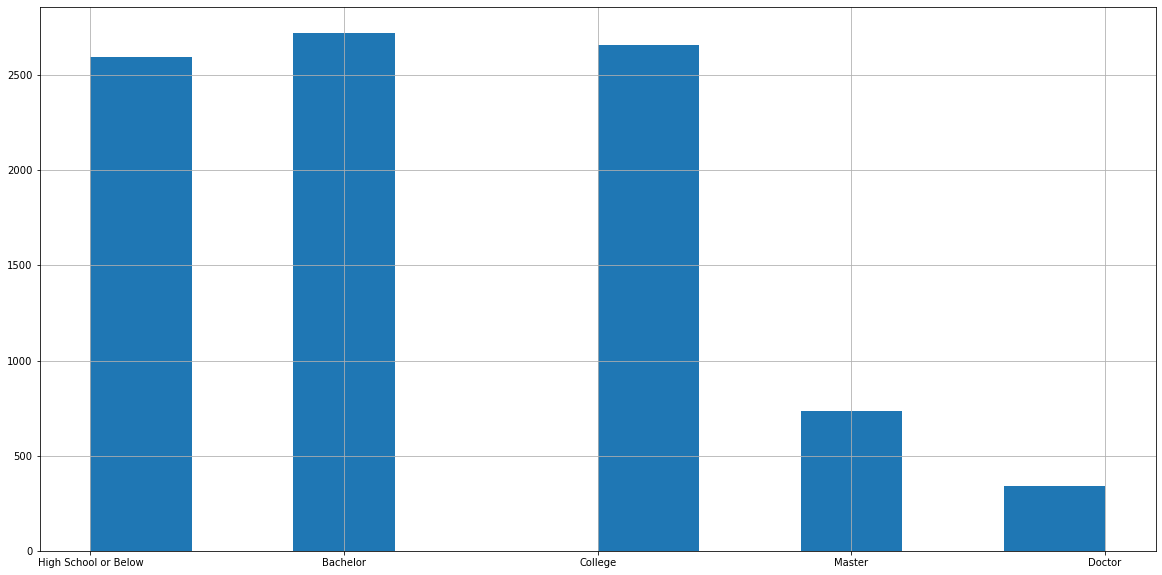

In [725]:
df['Education'].hist()

In [726]:
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])

<AxesSubplot:>

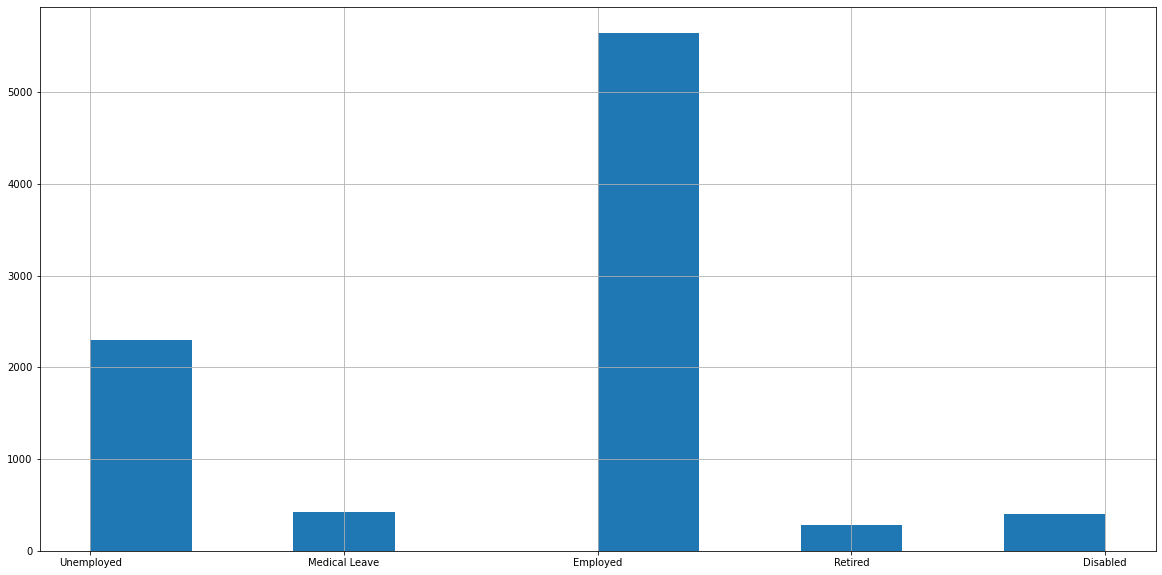

In [727]:
df['EmploymentStatus'].hist()

Since the majority of customers are 'Employed', so we replace the missing values with mode.

In [728]:
df['EmploymentStatus'] = df['EmploymentStatus'].fillna(df['EmploymentStatus'].mode()[0])

<AxesSubplot:>

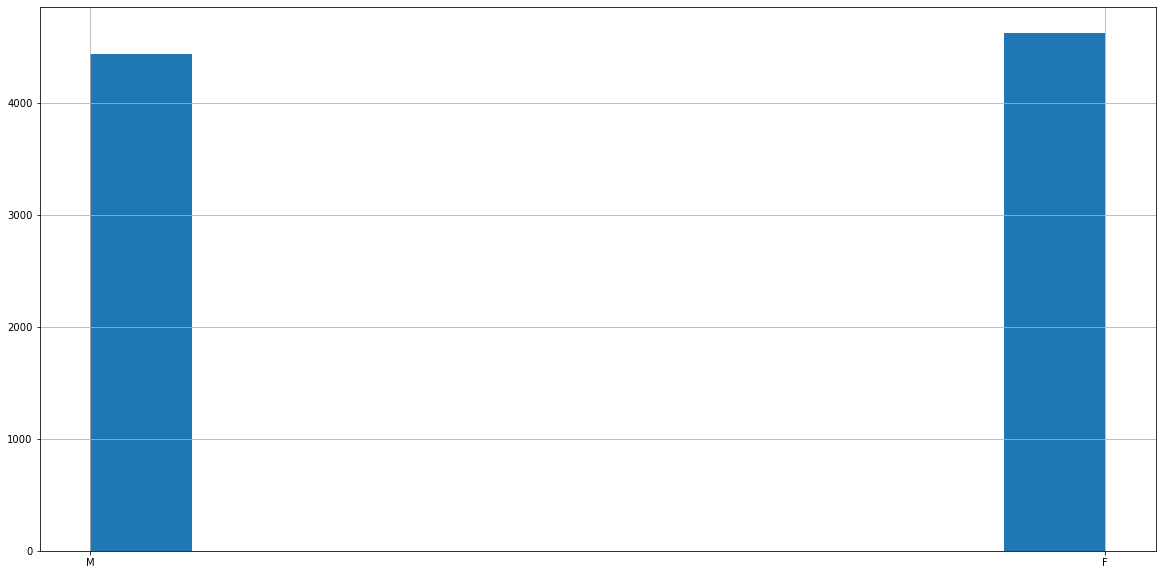

In [729]:
df['Gender'].hist()

Since the majority of customers are 'F', so we replace the missing values with mode.

In [730]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

<AxesSubplot:>

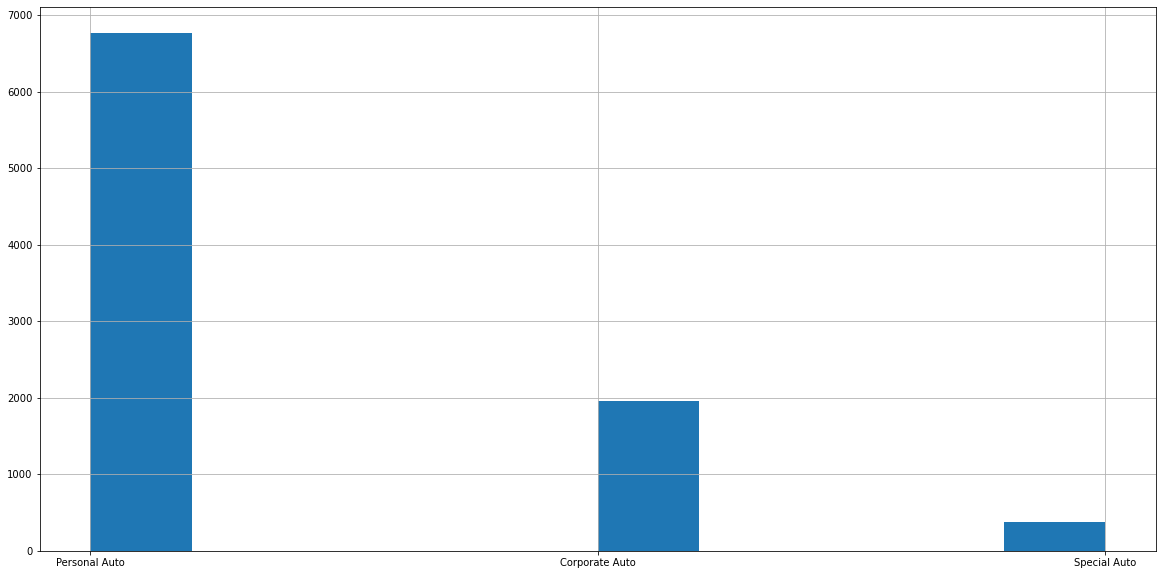

In [731]:
df['Policy Type'].hist()

Since the majority of customers have policy type 'Personal Auto', so we replace the missing values with mode.

In [732]:
df['Policy Type'] = df['Policy Type'].fillna(df['Policy Type'].mode()[0])

<AxesSubplot:>

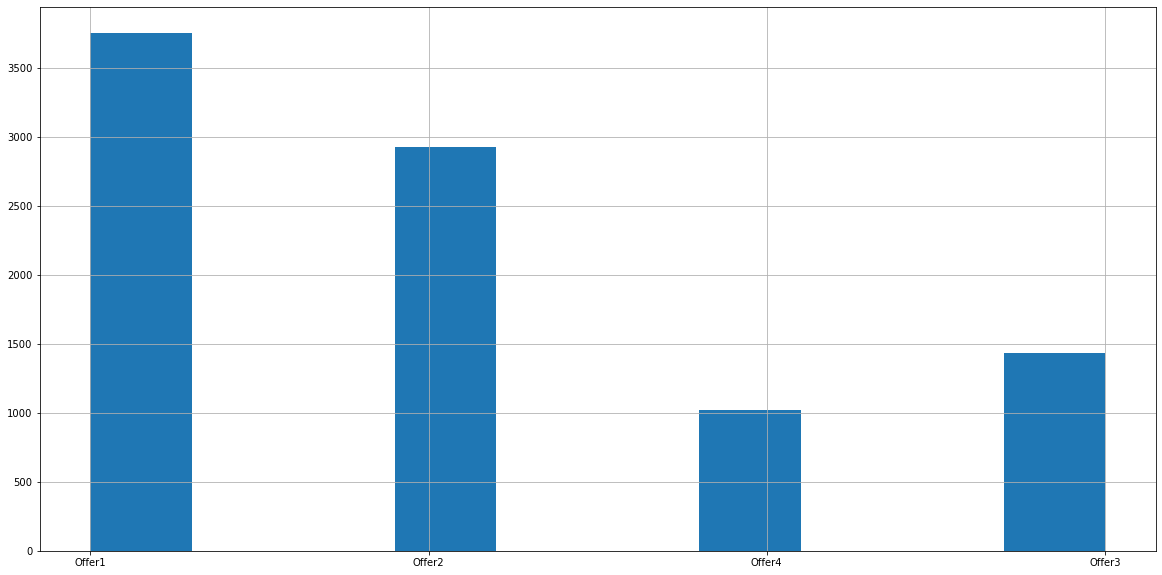

In [733]:
df['Renew Offer Type'].hist()

Since the majority of customers have Renew Offer Type 'Offer 1', so we replace the missing values with mode.

In [734]:
df['Renew Offer Type'] = df['Renew Offer Type'].fillna(df['Renew Offer Type'].mode()[0])

<AxesSubplot:>

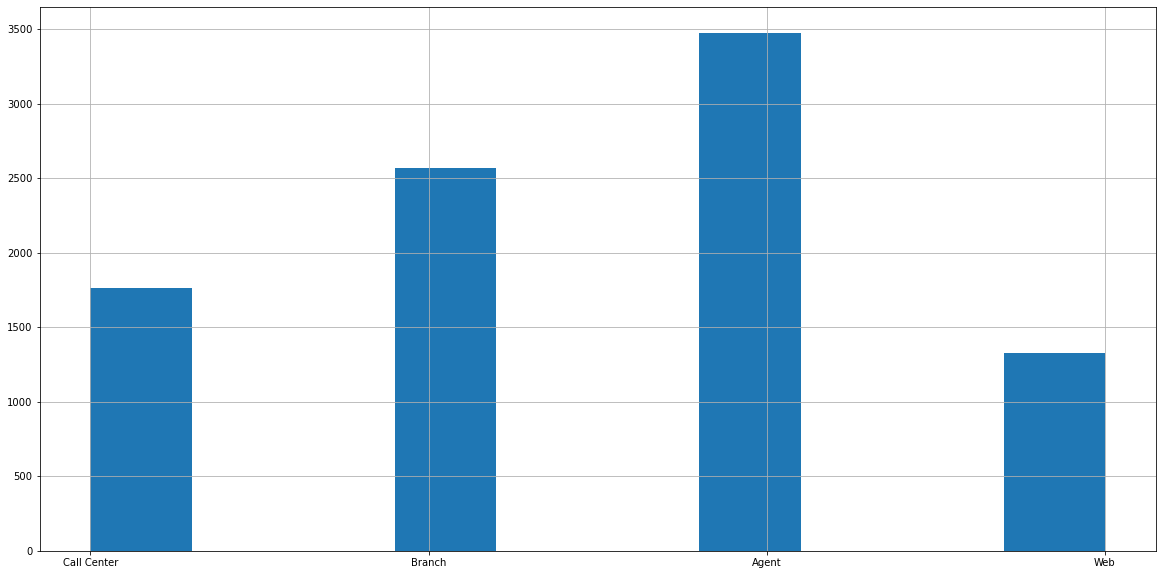

In [735]:
df['Sales Channel'].hist()

Since the majority of customers have sales channel 'Agent', so we replace the missing values with mode.

In [736]:
df['Sales Channel'] = df['Sales Channel'].fillna(df['Sales Channel'].mode()[0])

<AxesSubplot:>

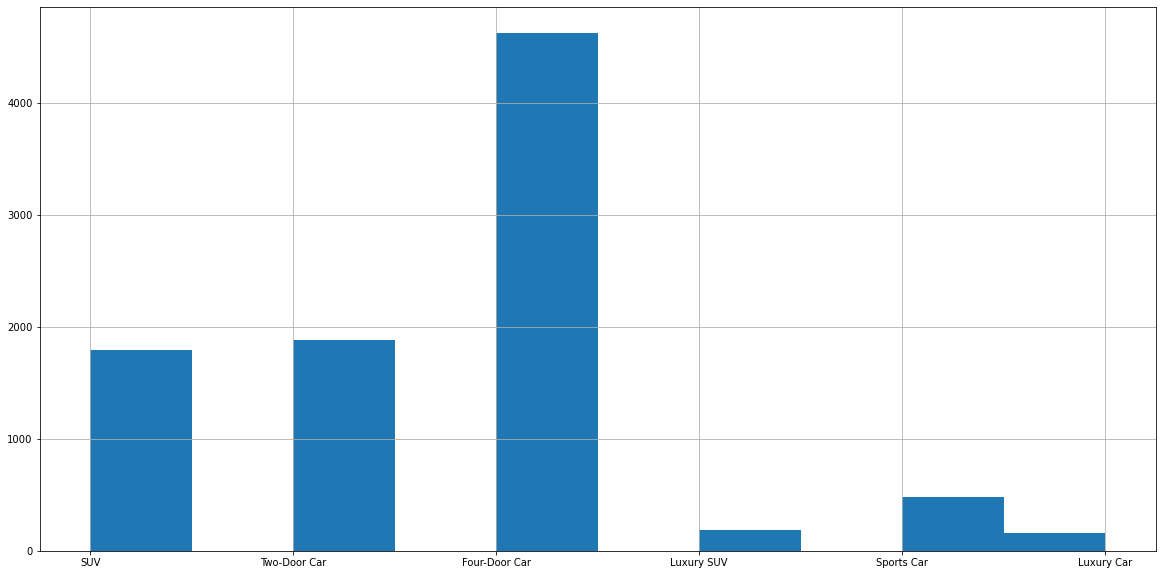

In [737]:
df['Vehicle Class'].hist()

Since the majority of customers have 'Four-Door Car', so we replace the missing values with mode.

In [738]:
df['Vehicle Class'] = df['Vehicle Class'].fillna(df['Vehicle Class'].mode()[0])

<AxesSubplot:>

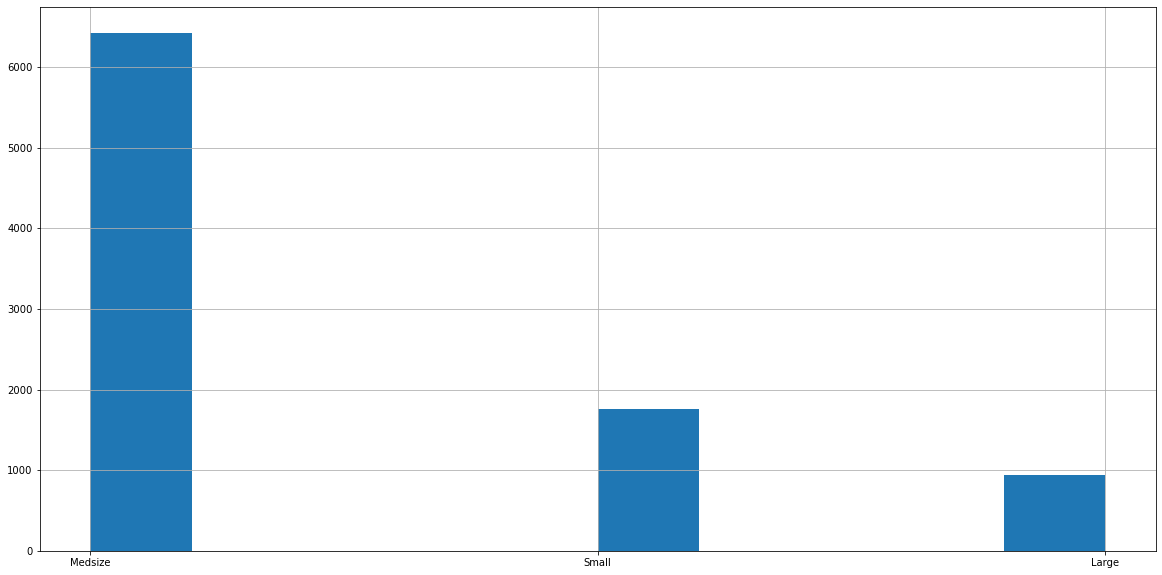

In [739]:
df['Vehicle Size'].hist()

Since the majority of customers have 'Medsize' car, so we replace the missing values with mode.

In [740]:
df['Vehicle Size'] = df['Vehicle Size'].fillna(df['Vehicle Size'].mode()[0])

<AxesSubplot:>

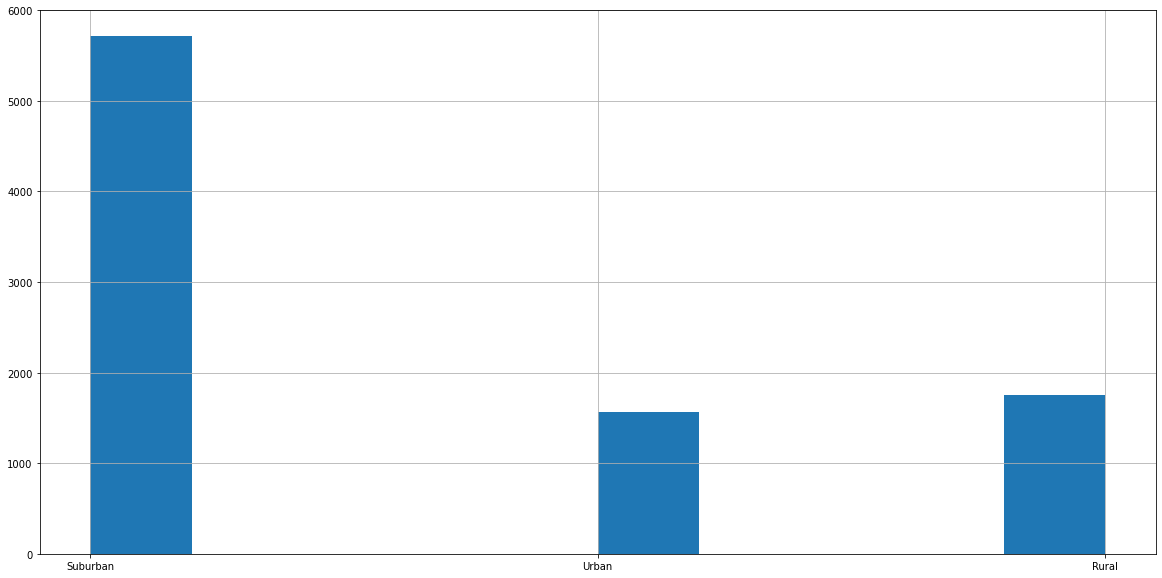

In [741]:
df['Location Code'].hist()

Since the majority of customers are from 'Suburban' location, so we replace the missing values with mode.

In [742]:
df['Location Code'] = df['Location Code'].fillna(df['Location Code'].mode()[0])

<AxesSubplot:>

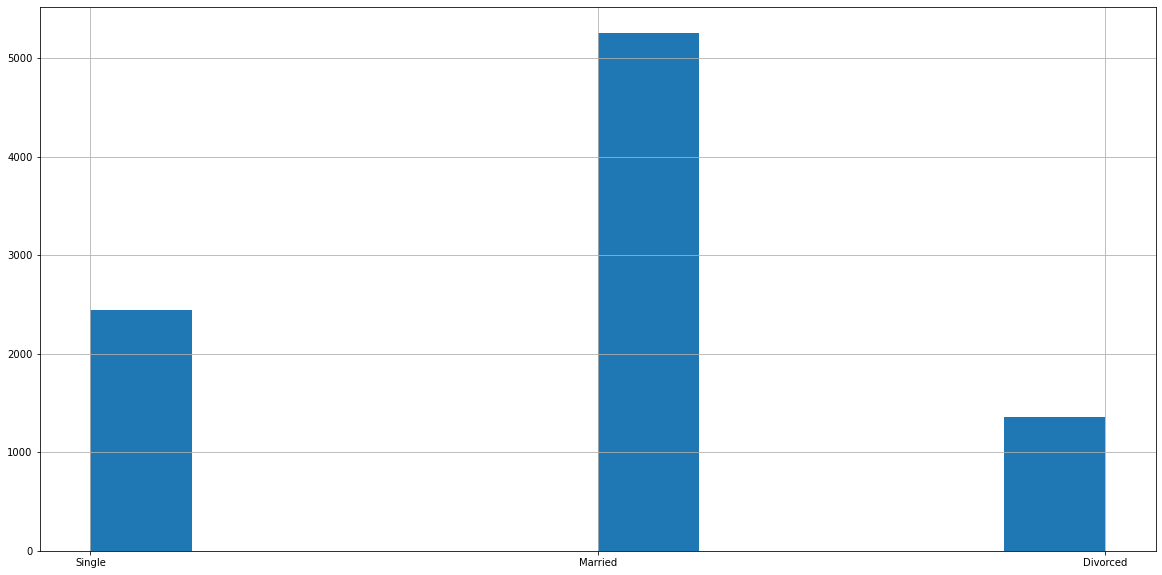

In [743]:
df['Marital Status'].hist()

Since the majority of customers are 'Married', so we replace the missing values with mode.

In [744]:
df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0])

<AxesSubplot:>

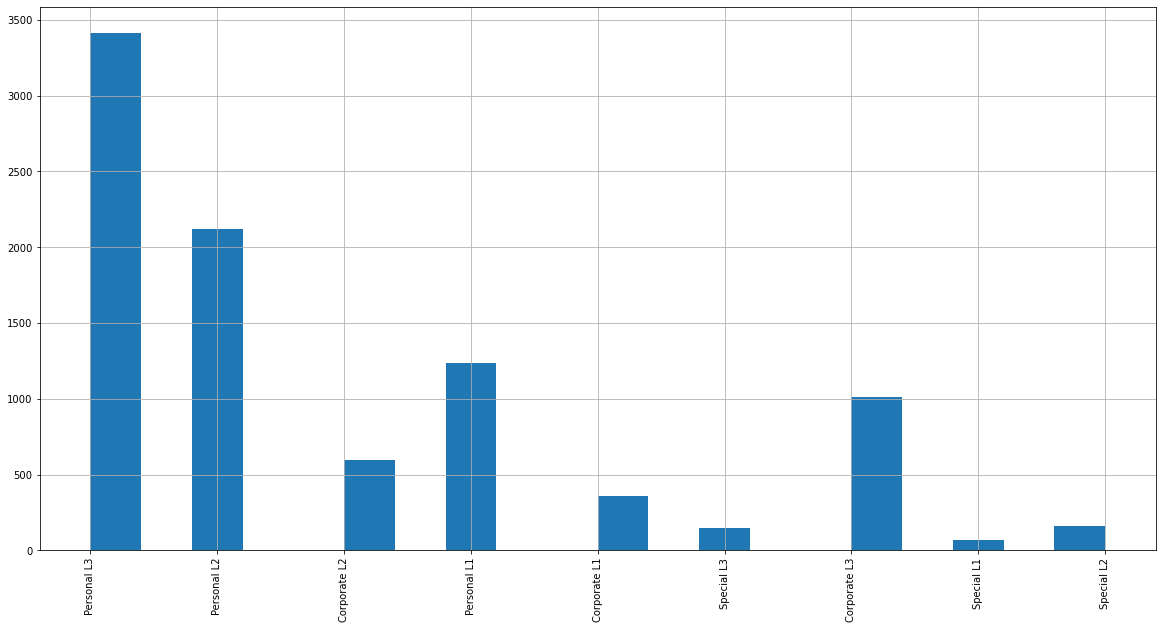

In [745]:
df['Policy'].hist(xrot=90, bins= 20)

Since the majority of customers have 'Personal L3', so we replace the missing values with mode.

In [746]:
df['Policy'] = df['Policy'].fillna(df['Policy'].mode()[0])

In [747]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9065 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   float64
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   f

### Dropping non important columns

In [748]:
df = df.drop(['Customer', 'State', 'Effective To Date'], axis=1)

In [749]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Response                       9134 non-null   object 
 2   Coverage                       9134 non-null   object 
 3   Education                      9134 non-null   object 
 4   EmploymentStatus               9134 non-null   object 
 5   Gender                         9134 non-null   object 
 6   Income                         9134 non-null   float64
 7   Location Code                  9134 non-null   object 
 8   Marital Status                 9134 non-null   object 
 9   Monthly Premium Auto           9134 non-null   float64
 10  Months Since Last Claim        9134 non-null   float64
 11  Months Since Policy Inception  9134 non-null   float64
 12  Number of Open Complaints      9134 non-null   f

### Handling Categorical or Ordinal Variables

#### Plotting histograms for categorical variables

<AxesSubplot:title={'center':'Gender Counts'}>

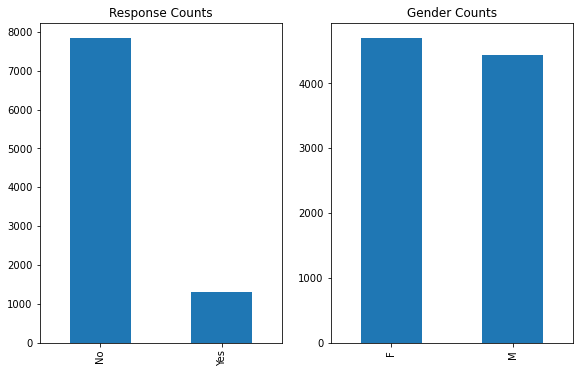

In [750]:
# Set up a grid of plots

plt.rc('figure', figsize=(20, 10))
fizsize_with_subplots = (20, 20)
bin_size = 10

fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Response'].value_counts().plot(kind='bar', 
                                         title='Response Counts')
plt.subplot2grid(fig_dims, (0, 1))
df['Gender'].value_counts().plot(kind='bar', 
                                         title='Gender Counts')

The frequent class in column Response is No, so we map 'No' to 1 and 'Yes' to 0.

The frequent class in column Gender is F, so we map 'F' to 1 and 'M' to 0.

In [751]:
df['Response'] = df['Response'].map({'No':1, 'Yes':0}).astype(int)
df['Gender'] = df['Gender'].map({'F':1, 'M':0}).astype(int)

<AxesSubplot:title={'center':'Policy Type Counts'}>

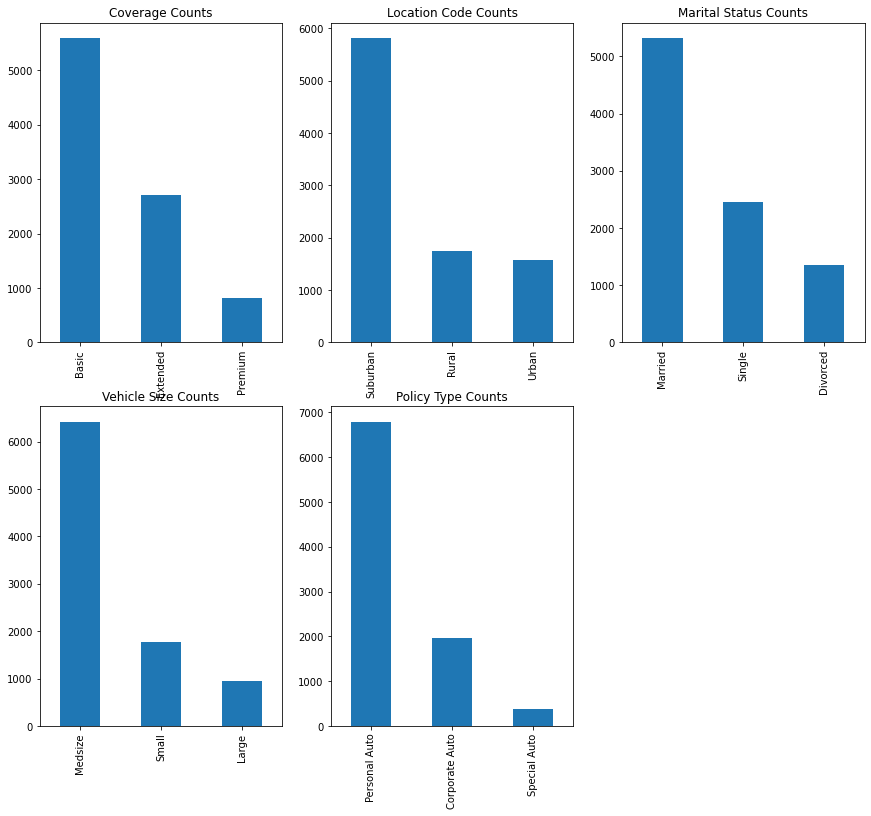

In [752]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Coverage'].value_counts().plot(kind='bar', 
                                         title='Coverage Counts')
plt.subplot2grid(fig_dims, (0, 1))
df['Location Code'].value_counts().plot(kind='bar', 
                                         title='Location Code Counts')

plt.subplot2grid(fig_dims, (0, 2))
df['Marital Status'].value_counts().plot(kind='bar', 
                                         title='Marital Status Counts')

plt.subplot2grid(fig_dims, (1, 0))
df['Vehicle Size'].value_counts().plot(kind='bar', 
                                         title='Vehicle Size Counts')

plt.subplot2grid(fig_dims, (1, 1))
df['Policy Type'].value_counts().plot(kind='bar', 
                                         title='Policy Type Counts')

We replace the columns Coverage, Location Code, Martial Status, Vehicle Size and Policy Type with a one-hot-vector of length 3.

In [753]:
cols = pd.get_dummies(df['Coverage'], prefix= 'Coverage')
df[cols.columns] = cols
df.drop('Coverage', axis = 1, inplace = True)

cols = pd.get_dummies(df['Location Code'], prefix= 'Location Code')
df[cols.columns] = cols
df.drop('Location Code', axis = 1, inplace = True)

cols = pd.get_dummies(df['Marital Status'], prefix= 'Marital Status')
df[cols.columns] = cols
df.drop('Marital Status', axis = 1, inplace = True)

cols = pd.get_dummies(df['Vehicle Size'], prefix= 'Vehicle Size')
df[cols.columns] = cols
df.drop('Vehicle Size', axis = 1, inplace = True)

cols = pd.get_dummies(df['Policy Type'], prefix= 'Policy Type')
df[cols.columns] = cols
df.drop('Policy Type', axis = 1, inplace = True)

<AxesSubplot:title={'center':'Sales Channel Counts'}>

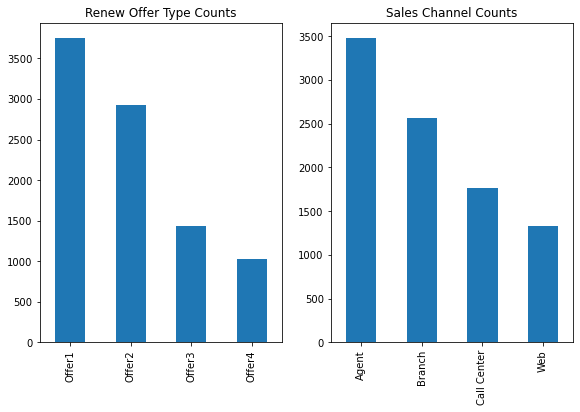

In [754]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Renew Offer Type'].value_counts().plot(kind='bar', 
                                         title='Renew Offer Type Counts')

plt.subplot2grid(fig_dims, (0, 1))
df['Sales Channel'].value_counts().plot(kind='bar', 
                                         title='Sales Channel Counts')

Here, we replace the columns Renew Offer Type and Sales Channel with a one-hot-vector of length 4.

In [755]:
cols = pd.get_dummies(df['Renew Offer Type'], prefix= 'Renew Offer Type')
df[cols.columns] = cols
df.drop('Renew Offer Type', axis = 1, inplace = True)

cols = pd.get_dummies(df['Sales Channel'], prefix= 'Sales Channel')
df[cols.columns] = cols
df.drop('Sales Channel', axis = 1, inplace = True)

<AxesSubplot:title={'center':'Employment Status Counts'}>

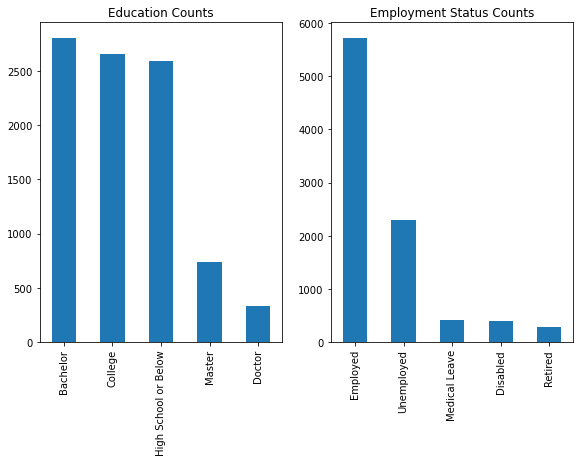

In [756]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Education'].value_counts().plot(kind='bar', 
                                         title='Education Counts')

plt.subplot2grid(fig_dims, (0, 1))
df['EmploymentStatus'].value_counts().plot(kind='bar', 
                                         title='Employment Status Counts')

Now, we replace the columns Education and Employment Status with a one-hot-vector of length 5.

In [757]:
cols = pd.get_dummies(df['Education'], prefix= 'Education')
df[cols.columns] = cols
df.drop('Education', axis = 1, inplace = True)

cols = pd.get_dummies(df['EmploymentStatus'], prefix= 'EmploymentStatus')
df[cols.columns] = cols
df.drop('EmploymentStatus', axis = 1, inplace = True)

<AxesSubplot:title={'center':'Vehicle Class Counts'}>

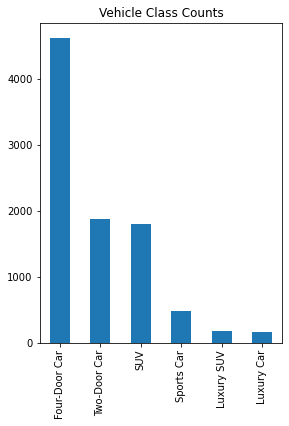

In [758]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Vehicle Class'].value_counts().plot(kind='bar', 
                                         title='Vehicle Class Counts')

Now, we replace the column Vehicle Class with a one-hot-vector of length 6.

In [759]:
cols = pd.get_dummies(df['Vehicle Class'], prefix= 'Vehicle Class')
df[cols.columns] = cols
df.drop('Vehicle Class', axis = 1, inplace = True)

<AxesSubplot:title={'center':'Policy Counts'}>

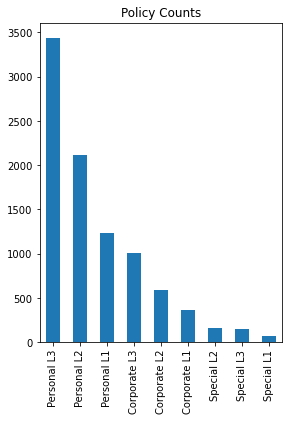

In [760]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Policy'].value_counts().plot(kind='bar', 
                                         title='Policy Counts')

Finally, we replace the column Policy with a one-hot-vector of length 9.

In [761]:
cols = pd.get_dummies(df['Policy'], prefix= 'Policy')
df[cols.columns] = cols
df.drop('Policy', axis = 1, inplace = True)

In [762]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer Lifetime Value         9134 non-null   float64
 1   Response                        9134 non-null   int64  
 2   Gender                          9134 non-null   int64  
 3   Income                          9134 non-null   float64
 4   Monthly Premium Auto            9134 non-null   float64
 5   Months Since Last Claim         9134 non-null   float64
 6   Months Since Policy Inception   9134 non-null   float64
 7   Number of Open Complaints       9134 non-null   float64
 8   Number of Policies              9134 non-null   float64
 9   Total Claim Amount              9134 non-null   float64
 10  Coverage_Basic                  9134 non-null   uint8  
 11  Coverage_Extended               9134 non-null   uint8  
 12  Coverage_Premium                91

### Splitting the data set

Our Target variable is Customer Lifetime Value

In [763]:
x = df.drop('Customer Lifetime Value', axis = 1)
y = df['Customer Lifetime Value']

Splitting the dataframe into train and test data sets.

In [764]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

### Scalling the data

array([[<AxesSubplot:xlabel='Income', ylabel='Income'>,
        <AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Income'>,
        <AxesSubplot:xlabel='Months Since Last Claim', ylabel='Income'>,
        <AxesSubplot:xlabel='Months Since Policy Inception', ylabel='Income'>,
        <AxesSubplot:xlabel='Number of Open Complaints', ylabel='Income'>,
        <AxesSubplot:xlabel='Number of Policies', ylabel='Income'>,
        <AxesSubplot:xlabel='Total Claim Amount', ylabel='Income'>],
       [<AxesSubplot:xlabel='Income', ylabel='Monthly Premium Auto'>,
        <AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Monthly Premium Auto'>,
        <AxesSubplot:xlabel='Months Since Last Claim', ylabel='Monthly Premium Auto'>,
        <AxesSubplot:xlabel='Months Since Policy Inception', ylabel='Monthly Premium Auto'>,
        <AxesSubplot:xlabel='Number of Open Complaints', ylabel='Monthly Premium Auto'>,
        <AxesSubplot:xlabel='Number of Policies', ylabel='Monthly Premium Auto'>,
     

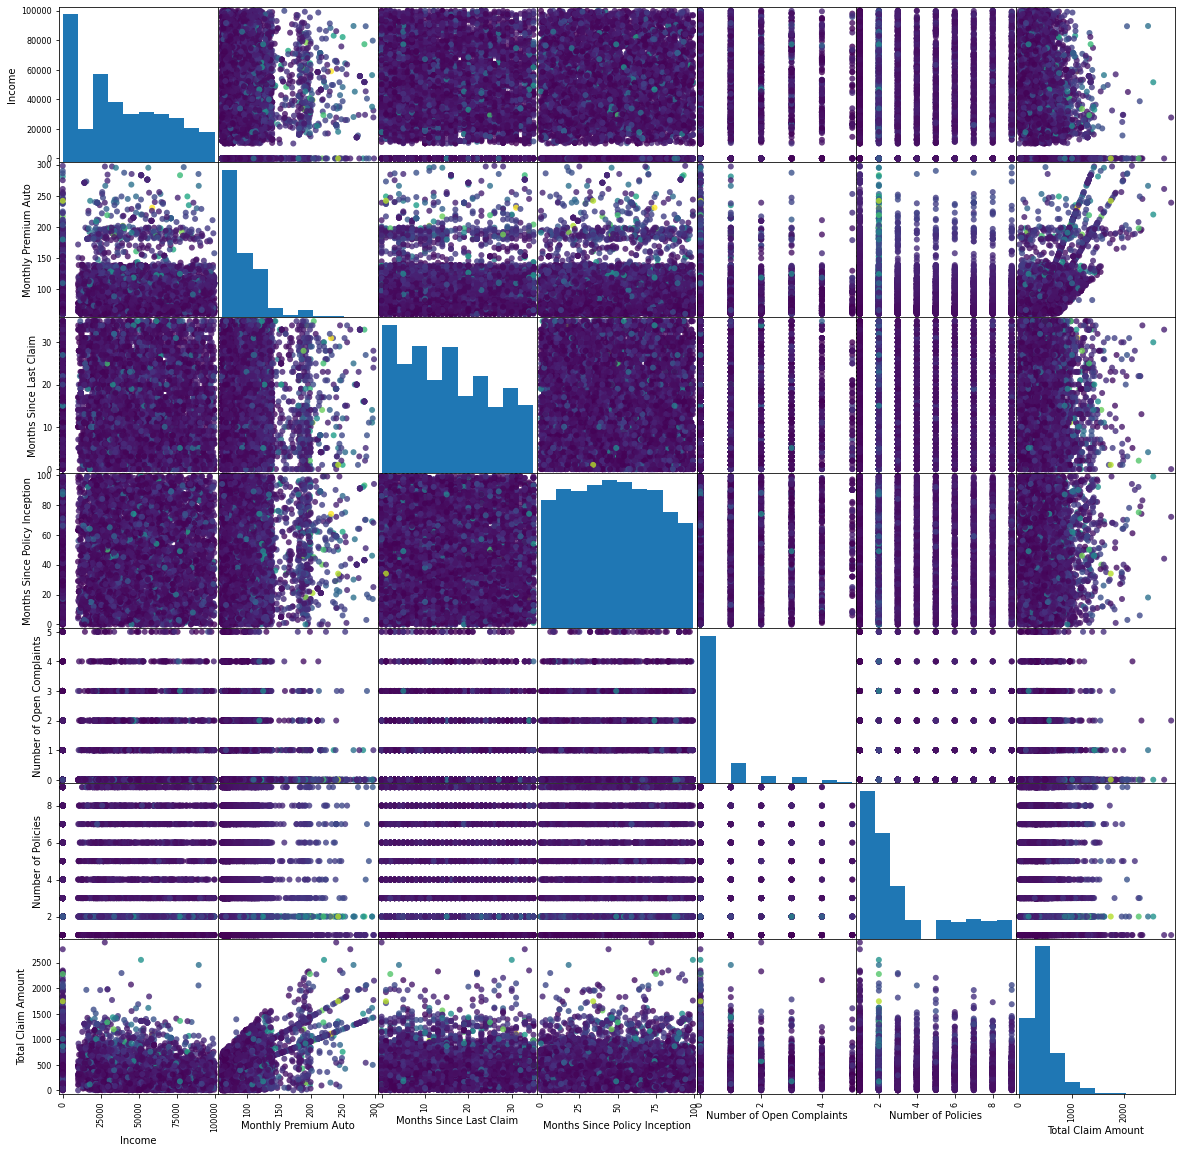

In [765]:
from pandas.plotting import scatter_matrix
attributes = ['Income','Monthly Premium Auto', 'Months Since Last Claim', 
              'Months Since Policy Inception', 'Number of Open Complaints',
              'Number of Policies', 'Total Claim Amount']
scatter_matrix(x[attributes], figsize = (20, 20), c = y, alpha = 0.8, marker = 'O')

In [766]:
x[attributes].describe()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,37610.040289,93.159185,15.096562,48.052406,0.383403,2.963652,434.088794
std,30299.572999,34.332429,10.046987,27.802299,0.910258,2.387739,290.500092
min,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,33881.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,62049.500000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


As we can clearly see that data for almost all the statistical varaibales is not normally distributed, hence we will use MinMaxScaller to scale the data.

In [767]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Final Processed Train and Test Dataset

In [768]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.0,1.0,0.285184,0.164557,0.114286,0.222222,0.2,0.125,0.165875,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.371451,0.092827,0.342857,0.010101,0.4,1.000,0.144198,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.000000,0.088608,0.000000,0.282828,0.0,0.000,0.204035,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.294916,0.004219,0.542857,0.737374,0.0,0.000,0.002609,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.639482,0.540084,0.114286,0.292929,0.0,0.500,0.264388,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [769]:
pd.DataFrame(x_test).head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1.0,1.0,0.607635,0.025316,0.114286,0.191919,0.0,0.750,0.143100,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.682740,0.172996,0.314286,0.818182,0.0,0.375,0.029034,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.000000,0.050633,0.342857,0.424242,0.0,0.750,0.274562,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.587892,0.274262,0.171429,0.626263,0.0,0.125,0.104362,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.788940,0.033755,0.257143,0.676768,0.2,0.375,0.161234,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Machine Learning Models

This function gives us the baseline MAE ans MSE Scores derived from the dataset.

In [770]:
def r2_score(Xtrain, Ytrain, Ytest):
    
    #Residual value
    SS_Residual = sum((Ytrain-Ytest)**2)
    #Sum squared total
    SS_Total = sum((Ytrain-np.mean(Ytrain))**2)
    #R2 value
    r2 = 1 - (float(SS_Residual))/SS_Total
    #Adjusted R2 value
    adjusted_r2 = 1 - (1-r2)*(len(Ytrain)-1)/(len(Ytrain)-Xtrain.shape[1]-1)
    
    return r2, adjusted_r2

This function yields predictive perfomance graph for the test data points as well train datapoints

In [771]:
def predictive_performance(ytrain, ytrain_pred, ytest, ytest_pred, size):
    
    fix ,axes = plt.subplots(ncols=2, figsize=size)

    m, b = np.polyfit(ytrain, ytrain_pred, 1) 
    axes[0].plot(ytrain, m*ytrain + b, color = 'red')        
    axes[0].scatter(ytrain, ytrain_pred, color = 'black')      
    axes[0].set_xlabel("Actual Data", fontsize=15)
    axes[0].set_ylabel("Predicted Value by Model", fontsize=15)
    axes[0].set_title("Train Data", fontsize=20)
    m1, b1 = np.polyfit(ytest, ytest_pred, 1)
    axes[1].plot(ytest, m1*ytest + b1, color = 'red')        
    axes[1].scatter(ytest, ytest_pred)      
    axes[1].set_xlabel("Actual Data", fontsize=15)
    axes[1].set_ylabel("Predicted Value by Model", fontsize=15)
    axes[1].set_title("Test Data", fontsize=20)

    return plt.show()

### Linear Regression

Train Cross-validation scores:
[0.15510942 0.19689443 0.2116099  0.14716685 0.16878687 0.12069963
 0.16574704 0.17048497 0.11963332 0.11107675]
Average Train Cross-validation score:0.15672091803538662


Test Cross-validation scores:
[ 8.29525022e-02  1.03644704e-01  1.96325580e-01  9.43438985e-02
  1.31961434e-01  3.79011160e-03 -1.05373686e+22  2.18891449e-03
  1.90371394e-01  7.47753410e-02]
Average Test Cross-validation score:-1.0537368585395968e+21


Model statistics:
Mean Absolute Error    4146.0026
Mean Squared Error     48838016.1771
R Square               0.1500
Adjusted R Square      0.1226




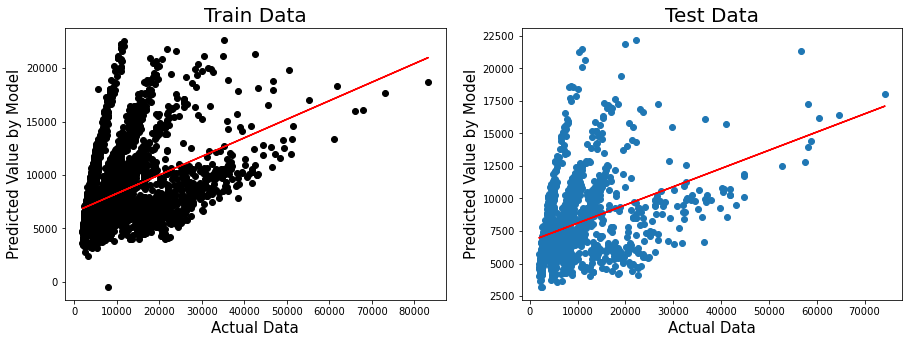

In [330]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

kfold = KFold(n_splits=10)
train_scores = cross_val_score(lreg, x_train, y_train, cv=kfold, scoring = 'r2', n_jobs =-1)
test_scores = cross_val_score(lreg, x_test, y_test, cv=kfold, scoring = 'r2', n_jobs =-1)

print("Train Cross-validation scores:\n{}".format(train_scores))
print("Average Train Cross-validation score:{}".format(train_scores.mean()))
print('\n') 

print("Test Cross-validation scores:\n{}".format(test_scores))
print("Average Test Cross-validation score:{}".format(test_scores.mean())) 
print('\n') 



lreg = LinearRegression().fit(x_train, y_train)

pred_train = lreg.predict(x_train)
pred_test = lreg.predict(x_test)


mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 


predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### KNN Regression

Grid Search with cross validation

In [362]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()
param_grid = {'n_neighbors': [1,2,7,10,15], 
              'weights': ['distance', 'uniform']}
grid_search = GridSearchCV(knn, param_grid, cv=5, return_train_score=True, verbose = 4, n_jobs = -1, scoring ='r2')

In [363]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:   59.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 7, 10, 15],
                         'weights': ['distance', 'uniform']},
             return_train_score=True, scoring='r2', verbose=4)

In [364]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 15, 'weights': 'distance'}
Best cross-validation score: 0.14


In [365]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.099761,0.003291,1.661540,0.005695,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",-0.321865,-0.497977,-0.549508,...,-0.496751,0.108120,10,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
1,0.092550,0.009340,1.669115,0.015011,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",-0.321865,-0.497977,-0.549508,...,-0.496751,0.108120,9,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
2,0.080142,0.001862,1.809076,0.021648,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",-0.075885,-0.105194,-0.089004,...,-0.112739,0.037323,8,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
3,0.080737,0.002671,1.879844,0.043164,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",-0.075861,-0.109969,-0.088580,...,-0.111557,0.031462,7,0.621085,0.633027,0.62188,0.629977,0.627622,0.626718,0.004613
4,0.083757,0.003444,2.067168,0.018025,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.114720,0.100763,0.140209,...,0.106101,0.021056,3,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000


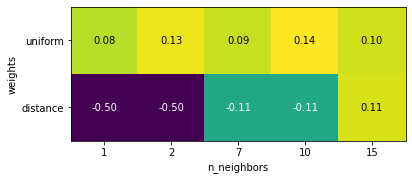

In [366]:
import mglearn
scores = np.array(results.mean_test_score).reshape(2, 5)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='n_neighbors', 
                      xticklabels=param_grid['n_neighbors'], ylabel='weights', 
                      yticklabels=param_grid['weights'], cmap="viridis")

Model statistics:
Mean Absolute Error    3973.2071
Mean Squared Error     50433945.4117
R Square               0.1223
Adjusted R Square      0.0940




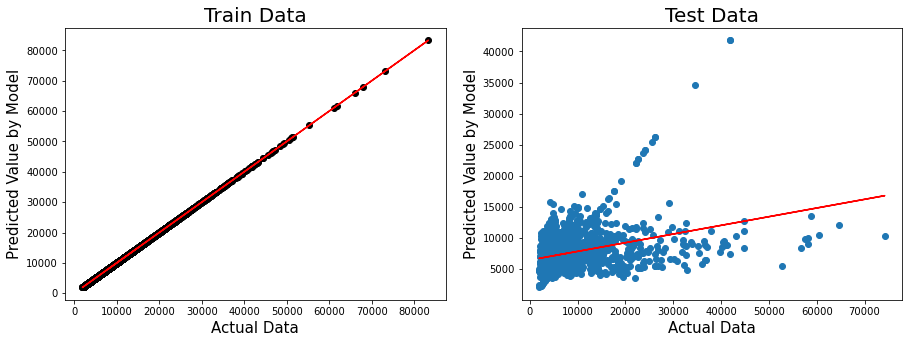

In [367]:
## fitting the model with best output
reg_knn = KNeighborsRegressor(weights = grid_search.best_params_['weights'], 
                              n_neighbors = grid_search.best_params_['n_neighbors'], n_jobs=-1).fit(x_train, y_train)

## output prediction
pred_train = reg_knn.predict(x_train)
pred_test = reg_knn.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### Ridge

In [368]:
from sklearn.linear_model import Ridge

x_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(x_train,y_train)
    train_score_list.append(ridge.score(x_train,y_train))
    test_score_list.append(ridge.score(x_test, y_test))

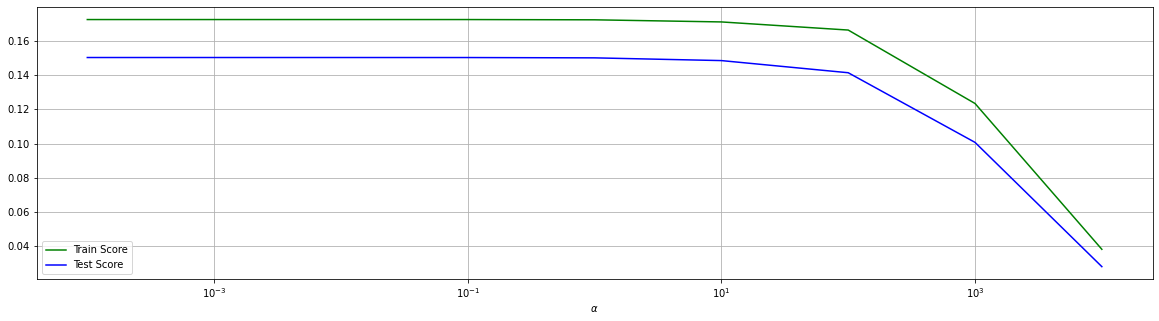

In [369]:
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [370]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.099761,0.003291,1.661540,0.005695,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",-0.321865,-0.497977,-0.549508,...,-0.496751,0.108120,10,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
1,0.092550,0.009340,1.669115,0.015011,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",-0.321865,-0.497977,-0.549508,...,-0.496751,0.108120,9,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
2,0.080142,0.001862,1.809076,0.021648,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",-0.075885,-0.105194,-0.089004,...,-0.112739,0.037323,8,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
3,0.080737,0.002671,1.879844,0.043164,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",-0.075861,-0.109969,-0.088580,...,-0.111557,0.031462,7,0.621085,0.633027,0.62188,0.629977,0.627622,0.626718,0.004613
4,0.083757,0.003444,2.067168,0.018025,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.114720,0.100763,0.140209,...,0.106101,0.021056,3,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000


In [371]:
ridge = Ridge()

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, return_train_score=True,
                           scoring = 'r2', n_jobs =-1)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             return_train_score=True, scoring='r2')

In [372]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.16


Model statistics:
Mean Absolute Error    4151.2273
Mean Squared Error     48934930.8970
R Square               0.1483
Adjusted R Square      0.1209




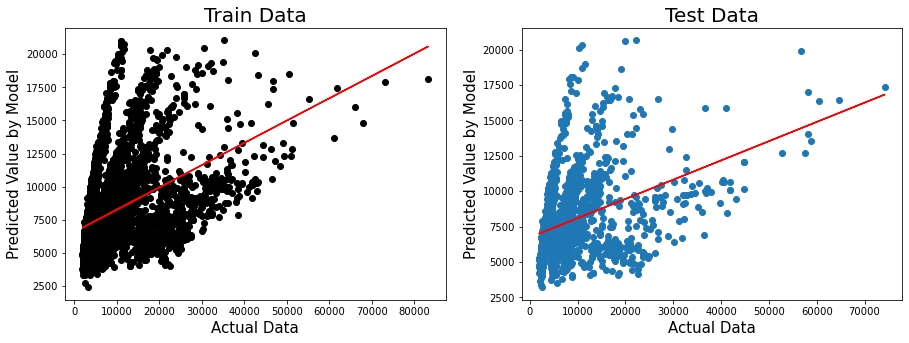

In [373]:
## fitting the model with best output
r_ridge = Ridge(alpha = grid_search.best_params_['alpha']).fit(x_train, y_train)

## output prediction
pred_train = r_ridge.predict(x_train)
pred_test = r_ridge.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### Lasso

In [374]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
x_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha, tol=1)
    lasso.fit(x_train,y_train)
    train_score_list.append(lasso.score(x_train,y_train))
    test_score_list.append(lasso.score(x_test, y_test))

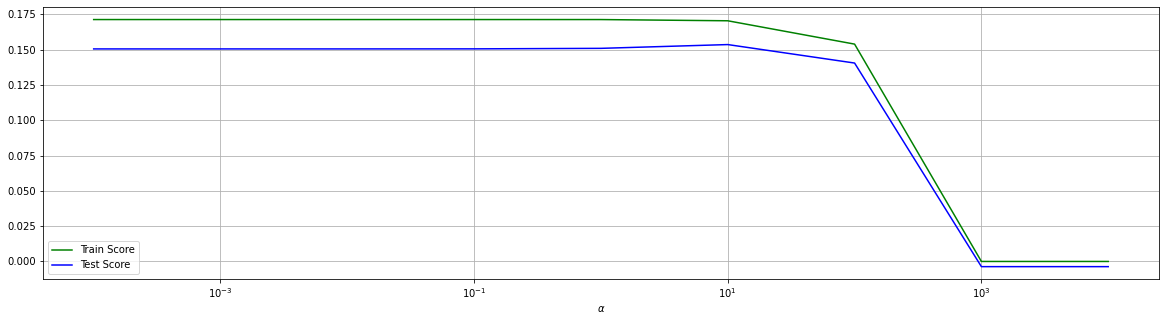

In [375]:
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [376]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009899,0.001327,0.000911,0.000371,0.0001,{'alpha': 0.0001},0.172101,0.171515,0.143926,0.165536,...,0.153684,0.021738,6,0.168136,0.170355,0.176931,0.170813,0.184412,0.174129,0.005912
1,0.007830,0.001597,0.000697,0.000138,0.001,{'alpha': 0.001},0.172107,0.171515,0.143927,0.165542,...,0.153687,0.021739,5,0.168136,0.170355,0.176931,0.170813,0.184412,0.174129,0.005912
2,0.010715,0.003221,0.000961,0.000274,0.01,{'alpha': 0.01},0.172165,0.171521,0.143932,0.165604,...,0.153718,0.021748,4,0.168136,0.170355,0.176931,0.170813,0.184412,0.174129,0.005912
3,0.009848,0.002813,0.001048,0.000081,0.1,{'alpha': 0.1},0.172664,0.171574,0.143987,0.166152,...,0.153989,0.021827,3,0.168133,0.170349,0.176927,0.170801,0.184404,0.174123,0.005911
4,0.009554,0.001522,0.001268,0.000172,1,{'alpha': 1},0.174495,0.171657,0.144492,0.168498,...,0.155096,0.022113,2,0.168004,0.170121,0.176737,0.170400,0.184111,0.173875,0.005892


In [377]:
lasso = Lasso(tol=1)

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]}
grid_search = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True,
                           scoring = 'r2', n_jobs =-1)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(tol=1), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             return_train_score=True, scoring='r2')

In [378]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.16


Model statistics:
Mean Absolute Error    4140.6349
Mean Squared Error     48745586.0153
R Square               0.1516
Adjusted R Square      0.1243




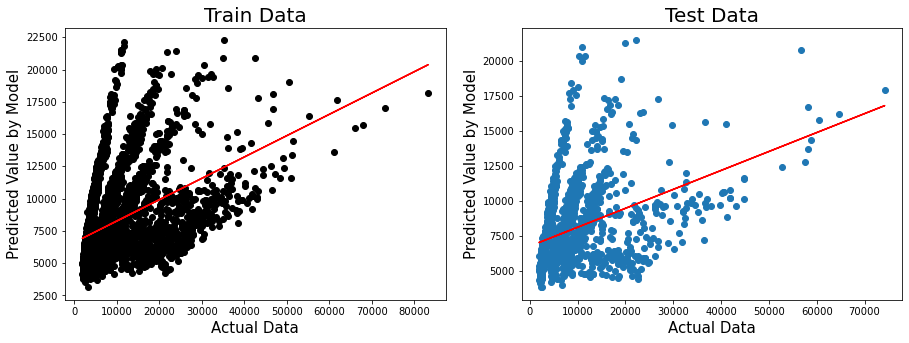

In [379]:
## fitting the model with best output
r_lasso = Lasso(alpha = grid_search.best_params_['alpha']).fit(x_train, y_train)

## output prediction
pred_train = r_lasso.predict(x_train)
pred_test = r_lasso.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### LinearSVR

In [380]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             "loss" : ["epsilon_insensitive", "squared_epsilon_insensitive"]}

lsvr = LinearSVR(tol = 1)
grid_search = GridSearchCV(lsvr, param_grid, cv=5, return_train_score=True, scoring = 'r2', n_jobs=-1, verbose = 4)

In [381]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=LinearSVR(tol=1), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'loss': ['epsilon_insensitive',
                                  'squared_epsilon_insensitive']},
             return_train_score=True, scoring='r2', verbose=4)

In [382]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.001, 'loss': 'squared_epsilon_insensitive'}
Best cross-validation score: 0.13


In [383]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_loss,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007563,0.000723,0.000595,0.000027,0.001,epsilon_insensitive,"{'C': 0.001, 'loss': 'epsilon_insensitive'}",-1.276316,-1.335675,-1.453613,...,-1.394432,0.074728,14,-1.421005,-1.403530,-1.373937,-1.374554,-1.375537,-1.389713,0.019234
1,0.008041,0.001298,0.000921,0.000187,0.001,squared_epsilon_insensitive,"{'C': 0.001, 'loss': 'squared_epsilon_insensit...",0.147091,0.131620,0.125265,...,0.129284,0.017641,1,0.137634,0.139719,0.144859,0.142052,0.148843,0.142622,0.003933
2,0.010753,0.001468,0.001110,0.000194,0.01,epsilon_insensitive,"{'C': 0.01, 'loss': 'epsilon_insensitive'}",-1.158506,-1.213516,-1.321653,...,-1.266326,0.067892,13,-1.290619,-1.274438,-1.247248,-1.248937,-1.248921,-1.262033,0.017510
3,0.009761,0.001545,0.001211,0.000271,0.01,squared_epsilon_insensitive,"{'C': 0.01, 'loss': 'squared_epsilon_insensiti...",0.122939,0.031589,0.059598,...,0.054066,0.042250,2,0.103262,0.058931,0.086496,0.048166,0.077701,0.074911,0.019578
4,0.009405,0.000852,0.000780,0.000173,0.1,epsilon_insensitive,"{'C': 0.1, 'loss': 'epsilon_insensitive'}",-0.381371,-0.416566,-0.449819,...,-0.424110,0.024783,11,-0.432599,-0.432072,-0.413957,-0.419175,-0.415146,-0.422590,0.008145


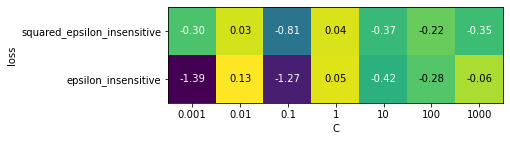

In [384]:
import mglearn
scores = np.array(results.mean_test_score).reshape(2, 7)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='C', 
                      xticklabels=param_grid['C'], ylabel='loss', 
                      yticklabels=param_grid['loss'], cmap="viridis")

Model statistics:
Mean Absolute Error    4349.8851
Mean Squared Error     50208278.1966
R Square               0.1262
Adjusted R Square      0.0980




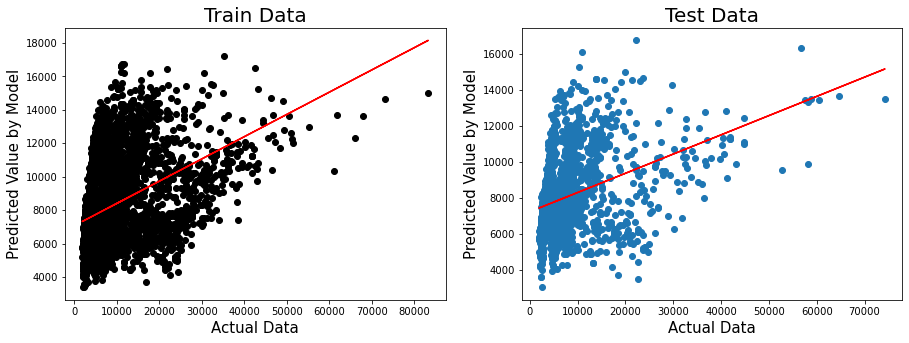

In [385]:
## fitting the model with best output
r_lin = LinearSVR(C = grid_search.best_params_['C'],
                    loss = grid_search.best_params_['loss'], 
                    tol = 1).fit(x_train, y_train)

## output prediction
pred_train = r_lin.predict(x_train)
pred_test = r_lin.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### SVR (Kernel = Linear)

In [386]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'kernel':['linear']}

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, return_train_score=True, verbose = 4, n_jobs = -1)

In [387]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   20.3s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   26.6s finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear']},
             return_train_score=True, verbose=4)

In [388]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'kernel': 'linear'}
Best cross-validation score: 0.04


In [389]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.616603,0.012169,0.639894,0.019107,0.001,linear,"{'C': 0.001, 'kernel': 'linear'}",-0.091932,-0.096811,-0.113438,...,-0.102945,0.011802,6,-0.101337,-0.101518,-0.100298,-0.104336,-0.104639,-0.102426,0.001737
1,3.522456,0.159548,0.627150,0.004985,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",-0.090999,-0.095843,-0.113083,...,-0.102052,0.011935,5,-0.100355,-0.100528,-0.099912,-0.103156,-0.103606,-0.101511,0.001546
2,3.345291,0.013866,0.622031,0.002290,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",-0.082296,-0.086866,-0.104451,...,-0.093627,0.012029,4,-0.091246,-0.091323,-0.091359,-0.095452,-0.095302,-0.092936,0.001994
3,3.521517,0.095492,0.645026,0.014883,1,linear,"{'C': 1, 'kernel': 'linear'}",-0.037573,-0.039588,-0.058256,...,-0.046310,0.012223,3,-0.045586,-0.043224,-0.044908,-0.047853,-0.043289,-0.044972,0.001707
4,3.429885,0.272095,0.657022,0.012866,10,linear,"{'C': 10, 'kernel': 'linear'}",0.046863,0.055301,0.030752,...,0.042624,0.021810,1,0.044927,0.045420,0.045665,0.043073,0.047476,0.045312,0.001413


Model statistics:
Mean Absolute Error    3853.1958
Mean Squared Error     56678308.9744
R Square               0.0136
Adjusted R Square      -0.0182




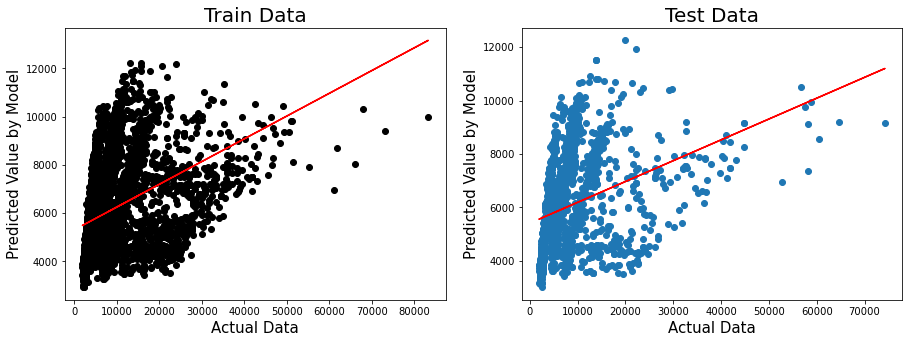

In [390]:
r_svrlin = SVR(C = grid_search.best_params_['C'],
                    kernel = 'linear', 
                    tol = 1).fit(x_train, y_train)

## output prediction
pred_train = r_svrlin.predict(x_train)
pred_test = r_svrlin.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### SVR(Kernel = Poly)

In [427]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 
              'gamma': [0.1, 1, 10], 
              'kernel':['poly']}

svr = SVR(cache_size = 14000)
grid_search = GridSearchCV(svr, param_grid, cv=2, return_train_score=True, scoring = 'r2', n_jobs=-1, verbose = 4)

In [428]:
grid_search.fit(x_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  18 | elapsed:    9.8s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  1.3min remaining:   30.7s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  6.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  6.1min finished


GridSearchCV(cv=2, estimator=SVR(cache_size=14000), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10],
                         'kernel': ['poly']},
             return_train_score=True, scoring='r2', verbose=4)

In [429]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'poly'}
Best cross-validation score: 0.12


In [430]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,1.392053,0.025745,0.939545,0.008307,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",-0.096017,-0.106888,-0.101452,0.005436,6,-0.095069,-0.107085,-0.101077,0.006008
1,1.442366,0.007605,0.960167,0.005915,0.1,1,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.045355,0.042680,0.044018,0.001337,3,0.059366,0.061536,0.060451,0.001085
2,85.297993,10.406355,0.834323,0.052152,0.1,10,poly,"{'C': 0.1, 'gamma': 10, 'kernel': 'poly'}",-0.086959,-0.191673,-0.139316,0.052357,7,0.763060,0.795434,0.779247,0.016187
3,1.416062,0.007367,0.951151,0.005094,1,0.1,poly,"{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}",-0.089056,-0.098976,-0.094016,0.004960,5,-0.087593,-0.099005,-0.093299,0.005706
4,1.890413,0.030482,0.925699,0.000917,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.066361,0.059491,0.062926,0.003435,2,0.122769,0.149049,0.135909,0.013140


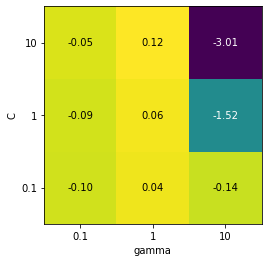

In [431]:
import mglearn
scores = np.array(results.mean_test_score).reshape(3, 3)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', 
                      xticklabels=param_grid['gamma'], ylabel='C', 
                      yticklabels=param_grid['C'], cmap="viridis")

Model statistics:
Mean Absolute Error    3484.3684
Mean Squared Error     51226138.4232
R Square               0.1085
Adjusted R Square      0.0797




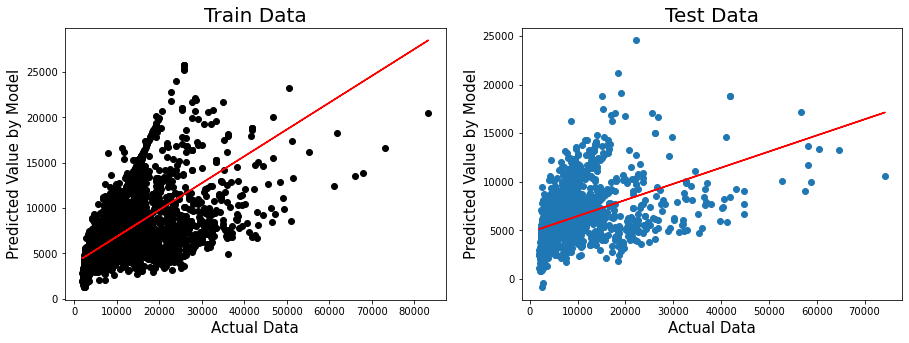

In [432]:
r_svrpoly = SVR(C = grid_search.best_params_['C'],
                    gamma = grid_search.best_params_['gamma'],
                    kernel = 'poly', cache_size = 8000).fit(x_train, y_train)

## output prediction
pred_train = r_svrpoly.predict(x_train)
pred_test = r_svrpoly.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### SVR (Kernel = rbf)

In [391]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001 ,0.1, 1, 10, 100, 1000], 
              'gamma': [0.001, 0.1, 1, 10, 100, 1000], 
              'kernel':['rbf']}

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, return_train_score=True, scoring = 'r2', n_jobs=-1, verbose = 4)

In [392]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.6min finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf']},
             return_train_score=True, scoring='r2', verbose=4)

In [393]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.05


In [394]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.846999,0.017344,0.876118,0.007152,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",-0.092031,-0.096886,...,-0.103036,0.01179,32,-0.101441,-0.101594,-0.100339,-0.104469,-0.104750,-0.102519,0.001764
1,4.915844,0.097845,0.867172,0.017234,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",-0.092026,-0.096883,...,-0.103031,0.01179,28,-0.101435,-0.101590,-0.100338,-0.104463,-0.104744,-0.102514,0.001762
2,4.934541,0.013521,0.851827,0.007095,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",-0.092031,-0.096886,...,-0.103036,0.01179,33,-0.101441,-0.101594,-0.100339,-0.104469,-0.104750,-0.102519,0.001764
3,5.580439,0.152147,1.015044,0.048575,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",-0.092031,-0.096886,...,-0.103036,0.01179,34,-0.101441,-0.101594,-0.100339,-0.104469,-0.104750,-0.102519,0.001764
4,4.698599,0.127080,0.996028,0.085182,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",-0.092031,-0.096886,...,-0.103036,0.01179,35,-0.101441,-0.101594,-0.100339,-0.104469,-0.104750,-0.102519,0.001764


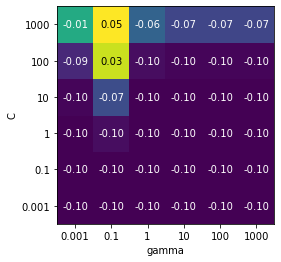

In [395]:
import mglearn
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', 
                      xticklabels=param_grid['gamma'], ylabel='C', 
                      yticklabels=param_grid['C'], cmap="viridis")

Model statistics:
Mean Absolute Error    3614.8669
Mean Squared Error     56519758.2581
R Square               0.0163
Adjusted R Square      -0.0154




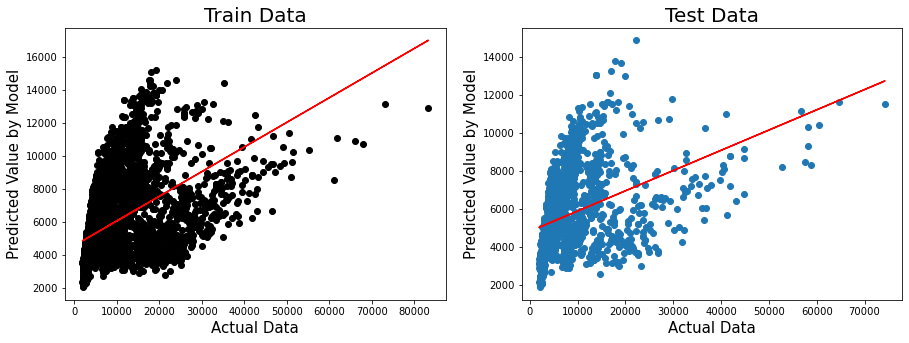

In [396]:
r_svrrbf = SVR(C = grid_search.best_params_['C'],
               gamma = grid_search.best_params_['gamma'],
               kernel = 'rbf', tol = 1).fit(x_train, y_train)

## output prediction
pred_train = r_svrrbf.predict(x_train)
pred_test = r_svrrbf.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### Decision Tree Regression

In [412]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[50, 100, 200, 300, 500, 1000],
              'min_samples_split':[100, 200, 300, 400, 500], 
              'min_samples_leaf':[1,2,3,4,5],
              'max_leaf_nodes':[1,2,3,4,5, None],
              'max_features' : ["auto", "sqrt", "log2"]}

clf = DecisionTreeRegressor()
grid_search = GridSearchCV(clf, param_grid, cv=5, return_train_score=True, verbose = 4, n_jobs = -1)

In [413]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1184 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 3920 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 7456 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 11760 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 13500 out of 13500 | elapsed:   42.1s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [50, 100, 200, 300, 500, 1000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [100, 200, 300, 400, 500]},
             return_train_score=True, verbose=4)

In [414]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 50, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 500}
Best cross-validation score: 0.66


In [415]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009987,0.001632,0.0,0.0,50,auto,1,1,100,"{'max_depth': 50, 'max_features': 'auto', 'max...",...,NaN,NaN,2700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.009031,0.002111,0.0,0.0,50,auto,1,1,200,"{'max_depth': 50, 'max_features': 'auto', 'max...",...,NaN,NaN,2344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.006418,0.001593,0.0,0.0,50,auto,1,1,300,"{'max_depth': 50, 'max_features': 'auto', 'max...",...,NaN,NaN,2325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.005287,0.000430,0.0,0.0,50,auto,1,1,400,"{'max_depth': 50, 'max_features': 'auto', 'max...",...,NaN,NaN,2306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.005446,0.000862,0.0,0.0,50,auto,1,1,500,"{'max_depth': 50, 'max_features': 'auto', 'max...",...,NaN,NaN,2310,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Model statistics:
Mean Absolute Error    1964.4023
Mean Squared Error     19618142.7632
R Square               0.6586
Adjusted R Square      0.6476




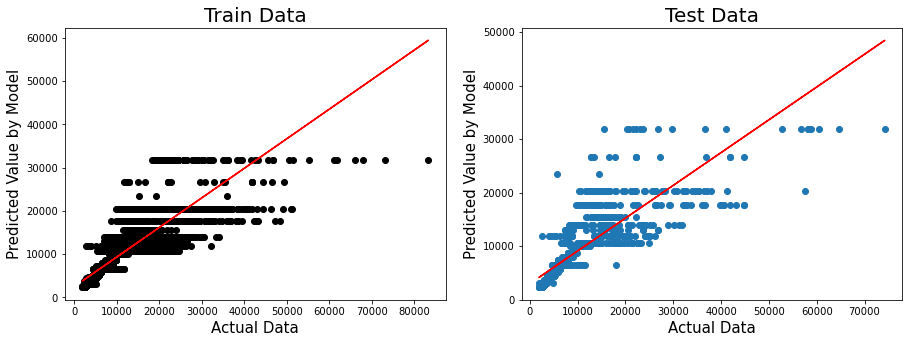

In [418]:
r_dec= DecisionTreeRegressor(max_depth = grid_search.best_params_['max_depth'], 
                             min_samples_split = grid_search.best_params_['min_samples_split'], 
                             max_leaf_nodes = grid_search.best_params_['max_leaf_nodes'],
                             min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                             max_features = grid_search.best_params_['max_features']).fit(x_train, y_train)

## output prediction
pred_train = r_dec.predict(x_train)
pred_test = r_dec.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### Random Forest

In [419]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[50, 100, 200, 300, 500, 1000],
              'min_samples_split':[100, 200, 300, 400, 500], 
              'min_samples_leaf':[1,2,3,4,5],
              'max_leaf_nodes':[1,2,3,4,5, None],
              'max_features' : ["auto", "sqrt", "log2"]
              }

rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=5, return_train_score=True, scoring = 'r2', n_jobs=-1, verbose = 4)

In [420]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1044 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1369 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1856 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2273 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2802 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 3485 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 4288 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 5021 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 5842 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 6625 tasks      | e

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [50, 100, 200, 300, 500, 1000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [100, 200, 300, 400, 500]},
             return_train_score=True, scoring='r2', verbose=4)

In [421]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 300, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 100}
Best cross-validation score: 0.69


In [422]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.049879,0.002089,0.0,0.0,50,auto,1,1,100,"{'max_depth': 50, 'max_features': 'auto', 'max...",...,NaN,NaN,2700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.062887,0.001898,0.0,0.0,50,auto,1,1,200,"{'max_depth': 50, 'max_features': 'auto', 'max...",...,NaN,NaN,2259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.060908,0.010429,0.0,0.0,50,auto,1,1,300,"{'max_depth': 50, 'max_features': 'auto', 'max...",...,NaN,NaN,2267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.066501,0.003229,0.0,0.0,50,auto,1,1,400,"{'max_depth': 50, 'max_features': 'auto', 'max...",...,NaN,NaN,2265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.076626,0.019243,0.0,0.0,50,auto,1,1,500,"{'max_depth': 50, 'max_features': 'auto', 'max...",...,NaN,NaN,2263,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Model statistics:
Mean Absolute Error    1807.0304
Mean Squared Error     18199175.3328
R Square               0.6833
Adjusted R Square      0.6731




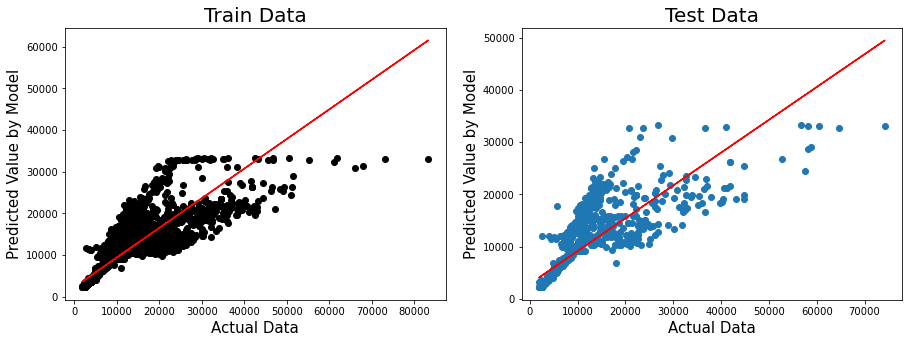

In [423]:
r_rand= RandomForestRegressor(max_depth = grid_search.best_params_['max_depth'], 
                             min_samples_split = grid_search.best_params_['min_samples_split'], 
                             max_leaf_nodes = grid_search.best_params_['max_leaf_nodes'],
                             min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                             max_features = grid_search.best_params_['max_features']).fit(x_train, y_train)

## output prediction
pred_train = r_rand.predict(x_train)
pred_test = r_rand.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

We can clearly see that RandomForestRegressor outperforms every other model with the followin results on the test data set:
    
    Mean Absolute Error    1807.0304
    Mean Squared Error     18199175.3328
    R Square               0.6833
    Adjusted R Square      0.6731

### FINAL MODEL: Random Forest

The best regressor for this dataset is RandomForestRegressor with following hyperparameters:

    max_depth: 300 
    max_features: auto
    max_leaf_nodes: None
    min_samples_leaf: 2 
    min_samples_split: 100

Training the model on the entire dataset with the best parameters.

Model statistics:
Mean Absolute Error    1806.4164
Mean Squared Error     18121427.4459
R Square               0.6846
Adjusted R Square      0.6745




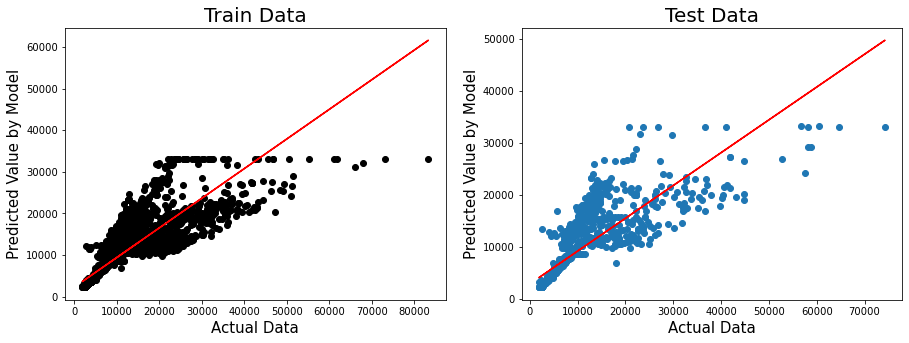

In [773]:
r_final= RandomForestRegressor(max_depth = 300, 
                             min_samples_split = 100, 
                             max_leaf_nodes = None,
                             min_samples_leaf = 2,
                             max_features = 'auto', n_jobs=-1).fit(x_train, y_train)

## output prediction
pred_train = r_final.predict(x_train)
pred_test = r_final.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### RESULTS 

After training the model on the train dataset we got the following results:
    
    Mean Absolute Error    1806.4164
    Mean Squared Error     18121427.4459
    R Square               0.6846
    Adjusted R Square      0.6745